

#Part 1 - Data processing
#Merge the participant and food consumption per day table

#Load drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load food consumption data and participant data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_food_nut = pd.read_csv("consumption_food_nut.csv", sep='|', encoding='latin1')
df_participant=pd.read_csv("participant.csv", sep='|', encoding='latin1')
df_food_nut_day = pd.read_csv("consumption_food_nut_per_day.csv", sep='|', encoding='latin1')
df_consumption_day=pd.read_csv("consumption_day.csv", sep='|', encoding='latin1')

/tmp/ipython-input-6-3313070941.py:1: DtypeWarning: Columns (23,56,57,62,63,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_nut = pd.read_csv("/content/drive/MyDrive/Nutrition in NL - Techlabs 2025 project/DNFCS2019_2021/CSV/consumption_food_nut.csv", sep='|', encoding='latin1')


Check the data table for the format and content

In [ ]:
df_food_nut.head()


,p_id,cd_id,mDay,fco,type,f_type,i_type,i_modif,hour,qli,...,ind_enrich_VITD,ind_enrich_vitD3,ind_enrich_VITE,ind_enrich_VITK,ind_enrich_b_carotene,ind_enrich_vitB3,ind_enrich_min,ind_enrich_vit,ind_enrich_vitmin,ind_enrich_vitMinFib
0,1,11,1,2,4,NaN,NaN,0,745,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11,1,2,4,NaN,NaN,0,745,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,1,2,4,NaN,NaN,0,745,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,11,1,2,4,NaN,NaN,0,745,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,11,1,2,4,SH,NaN,0,745,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_food_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204532 entries, 0 to 204531
Columns: 177 entries, p_id to ind_enrich_vitMinFib
dtypes: bool(1), float64(133), int64(17), object(26)
memory usage: 274.8+ MB


Check specific columns which are groups we want to look into
    
    ColumnName - Label
    prot - Total protein (g)
    fat - Total fat (g)
    carbo - Total carbohydrates (g)
    fibre - Fibre (g)

Subset the columns and check if there are missing values


In [ ]:
df_food_nut_sub=df_food_nut.iloc[:, :20].join(df_food_nut[['prot', 'fat', 'carbo', 'fibre']])

In [ ]:
df_food_nut_sub.head()

,p_id,cd_id,mDay,fco,type,f_type,i_type,i_modif,hour,qli,...,group,subgroup1,subgroup2,epicgrp,brandname,facets_str,prot,fat,carbo,fibre
0,1,11,1,2,4,NaN,NaN,0,745,1,...,13,3,1.0,13-03-01,NaN,NaN,0.253333,0.000000,0.126667,0.0000
1,1,11,1,2,4,NaN,NaN,0,745,1,...,5,7,1.0,05-07-01,milsani,"0802,1201",0.560000,0.328000,0.896000,0.0000
2,1,11,1,2,4,NaN,NaN,0,745,1,...,11,1,1.0,11-01-01,NaN,NaN,0.000000,0.000000,4.000000,0.0000
3,1,11,1,2,4,NaN,NaN,0,745,2,...,5,1,1.0,05-01-01,NaN,"0201,0408,0802",11.323133,4.662467,15.652566,0.0000
4,1,11,1,2,4,SH,NaN,0,745,2,...,6,4,NaN,06-04,brinta,"0701,1201",4.910400,0.937440,29.016000,4.6872


#Check the participant data before merging the dataset

In [ ]:
df_participant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Columns: 344 entries, p_id to KI_RLBEW2017
dtypes: float64(270), int64(63), object(11)
memory usage: 9.4+ MB


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_participant.head()

,p_id,age,age_gq,sex,quest,Age4_a,age6,Age8_a,Agesex4_a,Agesex6_a,Agesex8_a,Agesex10_a,agesex12,Agesex16_a,AdultChild_a,Height,Weight,Upperarm,BMI,BMI_cat,BMI_cat_a,Deviation_anthro,edu,edu_level,hh_size,hh_size_4,hh_stat,edu_moth,edu_fath,Migration_background,hh_province,hh_region_4,hh_urb_3,Season,Versionquest_a,FilledinBy,act_cyclnoschool_dpw,act_cyclnoschool_hpd,act_cyclnoschool_mpd,act_physact_tpwcat,ws_playschool_dpw,ws_playschool_hpd,ws_playschool_mpd,ws_swimschool_dpw,ws_swimschool_hpd,ws_swimschool_mpd,act_playnoschool_dpw,act_playnoschool_hpd,act_playnoschool_mpd,act_swimnoschool_dpw,act_swimnoschool_hpd,act_swimnoschool_mpd,act_walknoschool_dpw,act_walknoschool_hpd,act_walknoschool_mpd,act_playout_dpwcat,act_playout_tpdcat,ws_walk_dpw,ws_walk_hpd,ws_walk_mpd,ws_cycl_dpw,ws_cycl_hpd,ws_cycl_mpd,ws_gymschool_dpw,ws_gymschool_hpd,ws_gymschool_mpd,ws_sport_oth_dpw,ws_sport_oth_hpd,ws_sport_oth_mpd,ws_lw_hpw,ws_hw_hpw,workhh_lw_dpw,workhh_lw_hpd,workhh_lw_mpd,workhh_hw_dpw,workhh_hw_hpd,workhh_hw_mpd,walkrec_dpw,walkrec_hpd,walkrec_mpd,cyclrec_dpw,cyclrec_hpd,cyclrec_mpd,gard_dpw,gard_hpd,gard_mpd,odd_dpw,odd_hpd,odd_mpd,sport1_txt,sport1_code,sport1_dpw,sport1_hpd,sport1_mpd,sport2_txt,sport2_code,sport2_dpw,sport2_hpd,sport2_mpd,sport3_txt,sport3_code,sport3_dpw,sport3_hpd,sport3_mpd,sport4_txt,sport4_code,sport4_dpw,sport4_hpd,sport4_mpd,act_screen_week_dpwcat,act_screen_week_hpd,act_screen_week_mpd,act_screen_weekend_dpwcat,act_screen_weekend_hpd,act_screen_weekend_mpd,act_sleep_hpn,act_sleep_mpn,breakf_dpw_cat,act_stair,act_walkshort,appetite,DiffcEat,DiffcEat_chew,DiffcEat_move,DiffcEat_oth,DiffcEat_swall,DiffcEat_teeth,hotmealdeliv_freq,livingsit,thinner,weightloss,Stairs4,Undernutrition,Undernutrition_a,Weightloss3,dietno,diet_milk,diet_chick,diet_glut,diet_nut,diet_lact,diet_allergoth,diet_prot,diet_fat,diet_carborestr,diet_sugarrestr,diet_fibre,diet_energ,diet_Na,diet_easydigest,diet_col,diet_energprot,diet_oth2,rule_no,r_veg_meat,r_veg_meatfish,r_vegan,r_macrobiotic,r_anthr,r_other2,ffq_fish2,ffq_crustshell,ffq_nuts_peanuts,ffq_legumes,ffq_filetam_tpw,ffq_filetam_tpm,ffq_filetam_tpy,ffq_filetam_never,ffq_rbs_tpw,ffq_rbs_tpm,ffq_rbs_tpy,ffq_rbs_never,ffq_sss_tpw,ffq_sss_tpm,ffq_sss_tpy,ffq_sss_never,ffq_msraw_tpw,ffq_msraw_tpm,ffq_msraw_tpy,ffq_msraw_never,ffq_msmedium_tpw,ffq_msmedium_tpm,ffq_msmedium_tpy,ffq_msmedium_never,ffq_mswd_tpw,ffq_mswd_tpm,ffq_mswd_tpy,ffq_mswd_never,ffq_minceraw_tpw,ffq_minceraw_tpm,ffq_minceraw_tpy,ffq_minceraw_never,ffq_mincemedium_tpw,ffq_mincemedium_tpm,ffq_mincemedium_tpy,ffq_mincemedium_never,ffq_mincewd_tpw,ffq_mincewd_tpm,ffq_mincewd_tpy,ffq_mincewd_never,ffq_salt_use,ffq_salt_potato,ffq_salt_pasta,ffq_salt_veg,ffq_salt_meat,ffq_salt_egg,Salttype_potato,Salttype_pasta,Salttype_veg,Salttype_meat,Salttype_egg,Type_salt_other_txt,ffq_coffee_cpd,ffq_coffee_greecetc_cpd,tobac_smoke,tobac_ecigarette,use_alc,alcwd_dpw_cat,beerw_gpd,lowalcbeerw_gpd,winew_gpd,liqw_gpd,spiritw_gpd,mixw_gpd,alcwnd_dpw_cat,beerwnd_gpd,lowalcbeerwnd_gpd,winewnd_gpd,liqwnd_gpd,spiritwnd_gpd,mixwnd_gpd,ffq_sup,ffq_supwin,ffq_use_multmin_win,ffq_use_mult_win,ffq_use_beta_win,ffq_use_fol_win,ffq_use_vitb12_win,ffq_use_vitb_win,ffq_use_vitc_win,ffq_use_vitd_win,ffq_use_vite_win,ffq_use_ca_win,ffq_use_ca_d_win,ffq_use_fe_win,ffq_use_Mg_win,ffq_use_fishomega_win,ffq_use_garlic_win,ffq_use_ginseng_win,ffq_use_ginkgo_win,ffq_use_glucosamine_win,ffq_use_echina_win,ffq_use_Q10_win,ffq_use_cranberry_win,ffq_use_supoth1_win,ffq_use_supoth2_win,ffq_use_supoth3_win,ffq_use_supoth1_win_txt,ffq_use_supoth2_win_txt,ffq_use_supoth3_win_txt,ffq_multmin_win,ffq_mult_win,ffq_beta_win,ffq_fol_win,ffq_vitb12_win,ffq_vitb_win,ffq_vitc_win,ffq_vitd_win,ffq_vite_win,ffq_ca_win,ffq_ca_d_win,ffq_fe_win,ffq_Mg_win,ffq_fishomega_win,ffq_garlic_win,ffq_ginseng_win,ffq_ginkgo_win,ffq_glucosamine_win,ffq_echina_win,ffq_Q10_win,ffq_cranberry_win,ffq_supoth1_win,ffq_supoth2_win,ffq_supoth3_win,ffq_sup_rest,ffq_use_multmin_rest,ffq_use_mult

In [ ]:
df_participant.columns

Index(['p_id', 'age', 'age_gq', 'sex', 'quest', 'Age4_a', 'age6', 'Age8_a',
       'Agesex4_a', 'Agesex6_a',
       ...
       'ffq_supoth2_rest', 'ffq_supoth3_rest', 'w_demog', 'w_demog_season',
       'w_demog_season_wk_wknd', 'tvpc', 'rlbew3', 'Ind_MinWk', 'Ind_BotSpier',
       'KI_RLBEW2017'],
      dtype='object', length=344)

After checking the consumption_food_nut data and participant data, the consumption_food_nut_per_day data is more meaningful as it summarize the data of each participant for each day. Therefore,
#Consumption_food_nut_per_day data will be used for the following data analysis

In [ ]:
df_food_nut_day.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,prot_veg,prot_ani,fat,SFA,PUFA,MUFA,UFA_cis,TFA,LA,ALA,EPA,DHA,marine,cholest,carbo,modisac,polysac,fibre,fibre_MJ,alcohol,org_acid,ca,cu,fe,fe_haem,fe_nonhaem,iodine,kalium,mg,na,phosphorus,se,zn,b_carotene,ret,RAE,vitB1,vitB1_MJ,vitB2,vitB3,vitB3_MJ,vitB6,vitB12,syn_fol,folate,foleq,vitC,vitD,vitE,Vitk,Vitk1,water,ENprot,ENfat,enSFA,enPUFA,enMUFA,enUFA_cis,enTFA,enLA,enALA,enMarine,ENcarbo,ENmodisac,ENpolysac,ENadd_sugar,ENfree_sugar,ENalcohol,ENorg_acid
0,1,11,1,1808.959630,7607.587551,7.607588,54.718588,22.224330,32.517315,60.486726,24.861896,9.146671,21.901060,31.047731,0.238200,6.986509,0.907978,0.000000,0.000000,0.000000,111.822540,251.751935,120.788609,131.131826,18.909542,2.485616,0.0,0.522000,915.129344,0.874635,8.069003,0.36,7.709003,137.863258,2989.483293,264.731921,1544.283505,1221.012252,22.762673,7.249139,268.652827,329.345407,361.371757,1.141474,0.150044,1.628678,11.990882,1.576174,1.327895,2.997750,36.000003,143.055192,204.255197,43.790063,1.702000,8.112829,36.236393,28.841260,1772.955127,12.099460,30.093570,12.369379,4.550684,10.896293,15.446977,0.118510,3.475953,0.451741,0.000000,55.667784,26.708967,28.996076,NaN,NaN,0.0,0.086569
1,1,12,2,2302.919679,9676.782787,9.676783,88.036236,21.976600,66.095636,87.523827,36.878745,11.446372,32.224785,43.671157,0.285504,7.977591,1.712227,3.452000,10.500000,13.952000,161.662085,281.101835,154.887868,126.181800,16.905160,1.746981,0.0,2.629334,1497.196142,1.037229,7.886254,1.05,7.256254,200.177168,3946.418309,327.974957,2112.281934,1913.549377,37.502934,10.486481,92.280335,395.163794,399.210128,1.321005,0.136513,2.181666,14.089853,1.456047,1.179986,5.775678,0.000000,335.392620,335.392620,70.634334,2.870562,9.857339,89.936997,42.486927,2232.012006,15.291239,34.205033,14.412518,4.473336,12.593712,17.067048,0.111577,3.117708,0.669152,0.005453,48.825296,26.902869,21.916839,NaN,NaN,0.0,0.342522
2,2,21,1,2028.023607,8530.880049,8.530880,77.786069,29.298938,48.429143,60.644398,20.310128,11.016015,22.749960,33.765975,0.507048,9.398027,0.973590,11.892475,5.782087,17.674562,115.151452,280.762522,146.666979,134.095543,15.799438,1.852029,0.0,5.558485,783.810413,0.924756,7.982688,0.00,7.143224,183.222213,2870.715329,257.219292,2192.881846,1261.723900,35.722968,9.586552,286.834321,178.688295,216.517384,1.751294,0.205289,1.364691,15.626959,1.831811,1.384774,2.487435,0.000000,230.070020,230.070020,178.995162,0.824681,5.980006,29.823670,22.343436,1894.697867,15.342241,26.912881,9.013265,4.888707,10.096019,14.984726,0.225018,4.170673,0.432061,0.007844,55.376579,28.928062,26.448517,NaN,NaN,0.0,0.822252
3,2,22,2,2291.034409,9571.308049,9.571308,58.893552,34.289752,24.603800,120.999771,29.509965,36.607110,47.476655,84.083764,0.189000,34.637553,1.635220,18.200000,32.899999,51.099999,132.378000,228.588698,99.549367,128.762090,20.658634,2.158392,0.0,3.563600,782.287071,2.065319,8.501207,0.00,8.121207,127.495061,3030.684288,388.637358,2192.497394,1259.179869,72.724414,7.949913,713.916398,194.204001,260.646000,0.732209,0.076500,1.002132,16.070097,1.678986,1.217945,1.795680,0.000000,189.177001,189.177001,44.181034,0.432000,23.203248,34.602483,7.847283,2962.097806,10.282439,47.533024,11.592567,14.380578,18.650523,33.031101,0.074246,13.606866,0.642373,0.020074,39.910129,17.380685,22.481040,NaN,NaN,0.0,0.466636
4,3,31,1,1334.521491,5604.730102,5.604730,72.366940,21.786086,50.419426,44.597506,15.900441,8.099572,16.136302,24.235875,0.235656,6.375267,1.458450,9.830800,0.000000,9.830800,61.793716,148.389388,79.720545,68.786843,17.040340,3.040350,0.0,4.980500,987.438209,0.965948,5.834708,0.00,5.511851,149.739089,3280.577091,261.587891,1512.962230,1299.598496,32.650303,8.360705,4443.336917,267.037340,716.598460,1.815124,0.323856,1.690617,15.917383,2.839991,1.826060,2.933710,54.000004,233.277885,325.077893,237.267993,1.932594,7.652783,36.614193,32.966337,1586.859103,21.690753,30.076515,10.723242,5.462344,10.882307,16.344650,0.158926,4.299474,0.983577,0.006630,44.477182,2

In [ ]:
df_food_nut_day.shape

(7140, 76)

#Food groups to look into

    ColumnName - Label
    prot - Total protein (g)
    fat - Total fat (g)
    carbo - Total carbohydrates (g)
    fibre - Fibre (g)

Then subset the columns and check if there are missing values

In [ ]:
df_food_nut_day_sub=df_food_nut_day.iloc[:, :6].join(df_food_nut_day[['prot', 'fat', 'carbo', 'fibre']])

In [ ]:
df_food_nut_day_sub.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,fat,carbo,fibre
0,1,11,1,1808.959630,7607.587551,7.607588,54.718588,60.486726,251.751935,18.909542
1,1,12,2,2302.919679,9676.782787,9.676783,88.036236,87.523827,281.101835,16.905160
2,2,21,1,2028.023607,8530.880049,8.530880,77.786069,60.644398,280.762522,15.799438
3,2,22,2,2291.034409,9571.308049,9.571308,58.893552,120.999771,228.588698,20.658634
4,3,31,1,1334.521491,5604.730102,5.604730,72.366940,44.597506,148.389388,17.040340


In [ ]:
df_food_nut_day_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p_id    7140 non-null   int64  
 1   cd_id   7140 non-null   int64  
 2   mDay    7140 non-null   int64  
 3   enkcal  7140 non-null   float64
 4   ENkj    7140 non-null   float64
 5   ENmj    7140 non-null   float64
 6   prot    7140 non-null   float64
 7   fat     7140 non-null   float64
 8   carbo   7140 non-null   float64
 9   fibre   7140 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 557.9 KB


#Visualization of the food consumption per day by catergory and by day

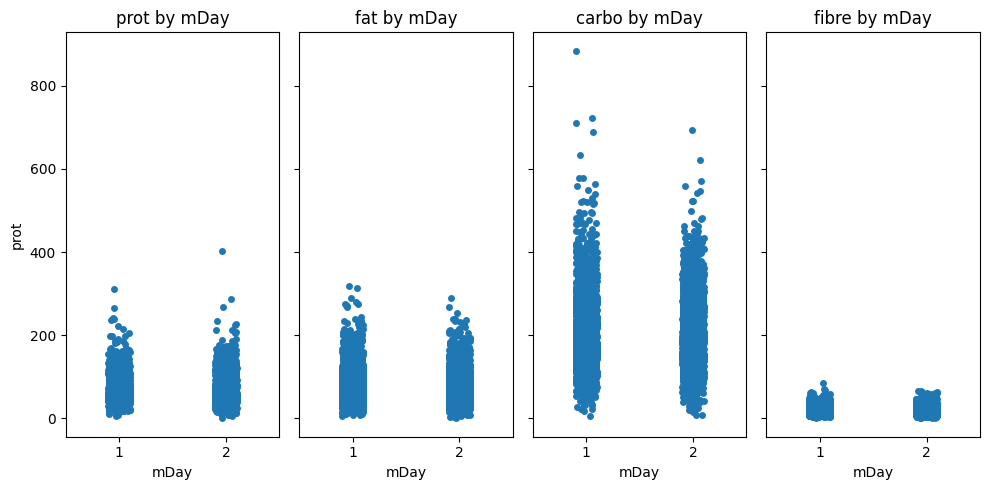

In [ ]:
# Set x and y variables
x_var = 'mDay'
y_vars = ['prot', 'fat', 'carbo', 'fibre']

# Create 1x4 subplots (1 rows, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(10, 5),sharey=True)

# Plot each y-variable with categorical x in a subplot
for ax, y in zip(axes, y_vars):
    sns.stripplot(data=df_food_nut_day_sub, x=x_var, y=y, ax=ax, jitter=True, size=5)
    ax.set_title(f'{y} by {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(y)

# Adjust layout
plt.tight_layout()
plt.show()

#Calculate and Visualize the difference between and the average of mDay1 and mDay2
To decide which day to zoom in or whether it is necessary to average the two days, the difference between and the average of these two days will be calculated and checked.

1.   Calculate the difference between and the average of mDay1 and mDay2
2.   Visualize the difference and the average


In [ ]:
# Columns to compute difference on
calc_cols = ['enkcal','ENkj','ENmj','prot', 'fat', 'carbo', 'fibre']

# Keep other columns (optional)
other_cols = [col for col in df_food_nut_day_sub.columns if col not in calc_cols]

# Store result rows
new_rows = []

for i in range(0, len(df_food_nut_day_sub), 2):
    row1 = df_food_nut_day_sub.iloc[i]
    new_rows.append(row1)

    if i + 1 < len(df_food_nut_day_sub):
        row2 = df_food_nut_day_sub.iloc[i + 1]
        new_rows.append(row2)

        # Compute difference and average
        diff = row2[calc_cols] - row1[calc_cols]
        avg = (row2[calc_cols] + row1[calc_cols]) / 2

        # Create diff row
        diff_row = pd.Series(index=df_food_nut_day_sub.columns)
        diff_row[calc_cols] = diff
        diff_row[other_cols] = row2[other_cols]
        diff_row['mDay'] = float(3.0)  # optional label

        # Create avg row
        avg_row = pd.Series(index=df_food_nut_day_sub.columns)
        avg_row[calc_cols] = avg
        avg_row[other_cols] = row2[other_cols]
        avg_row['mDay'] = float(4.0)  # optional label

        new_rows.append(diff_row)
        new_rows.append(avg_row)

# Combine into DataFrame
df_food_nut_day_sub_diff = pd.DataFrame(new_rows).reset_index(drop=True)


In [ ]:
df_food_nut_day_sub_diff.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,fat,carbo,fibre
0,1.0,11.0,1.0,1808.959630,7607.587551,7.607588,54.718588,60.486726,251.751935,18.909542
1,1.0,12.0,2.0,2302.919679,9676.782787,9.676783,88.036236,87.523827,281.101835,16.905160
2,1.0,12.0,3.0,493.960049,2069.195237,2.069195,33.317648,27.037101,29.349900,-2.004382
3,1.0,12.0,4.0,2055.939654,8642.185169,8.642185,71.377412,74.005277,266.426885,17.907351
4,2.0,21.0,1.0,2028.023607,8530.880049,8.530880,77.786069,60.644398,280.762522,15.799438


In [ ]:
df_food_nut_day_sub_diff.dtypes

,0
p_id,float64
cd_id,float64
mDay,float64
enkcal,float64
ENkj,float64
ENmj,float64
prot,float64
fat,float64
carbo,float64
fibre,float64


In [ ]:
df_food_nut_day_sub_diff['mDay'] = df_food_nut_day_sub_diff['mDay'].astype(float)

In [ ]:
#only visualize the difference
df_food_nut_day_sub_diff_only=df_food_nut_day_sub_diff.loc[df_food_nut_day_sub_diff['mDay']==3.0,:]
df_food_nut_day_sub_diff_only.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,fat,carbo,fibre
2,1.0,12.0,3.0,493.960049,2069.195237,2.069195,33.317648,27.037101,29.349900,-2.004382
6,2.0,22.0,3.0,263.010802,1040.428000,1.040428,-18.892517,60.355373,-52.173824,4.859197
10,3.0,32.0,3.0,10.284612,34.510033,0.034510,-20.837353,8.138312,3.792853,2.369487
14,4.0,42.0,3.0,105.752224,448.529667,0.448530,-82.166876,18.864970,65.588511,3.670949
18,5.0,52.0,3.0,344.834208,1422.713715,1.422714,-3.406138,43.925613,-8.441630,-1.139828


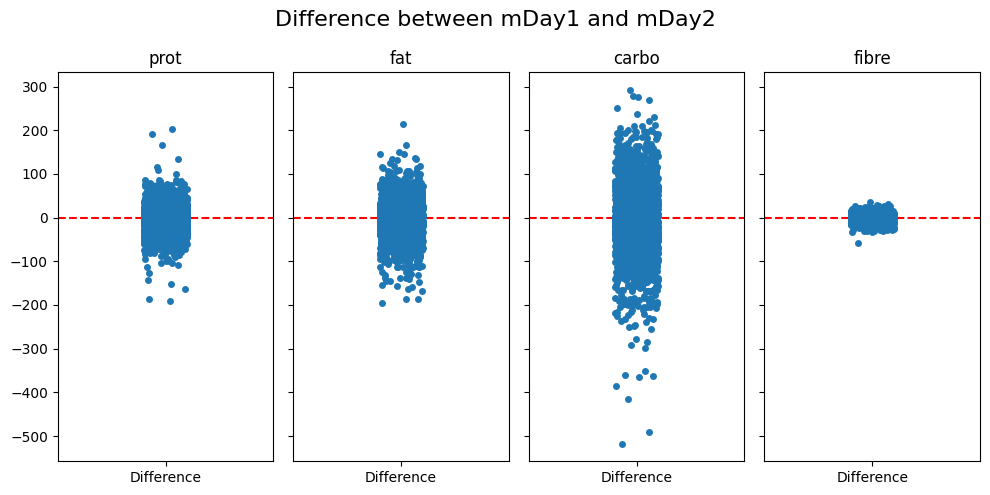

In [ ]:

# Set x and y variables
x_var = 'mDay'
y_vars = ['prot', 'fat', 'carbo', 'fibre']

# Create 1x4 subplots (1 rows, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(10,5),sharey=True)

# Define custom x-tick labels
custom_tick_positions = [0]
custom_tick_labels = ['Difference']

# Plot each y-variable with categorical x in a subplot
for ax, y in zip(axes, y_vars):
    sns.stripplot(data=df_food_nut_day_sub_diff_only, x=x_var, y=y, ax=ax, jitter=True, size=5)
    ax.set_title(f'{y}')
    ax.set_xlabel(x_var)
    ax.set_ylabel('')
    ax.axhline(y=0, color='r', linestyle='--')
    # Change x-axis labels
    ax.set_xticks(custom_tick_positions)
    ax.set_xticklabels(custom_tick_labels)
    #Remove x-axis label text
    ax.set_xlabel('')

# Add overall figure title
fig.suptitle('Difference between mDay1 and mDay2', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


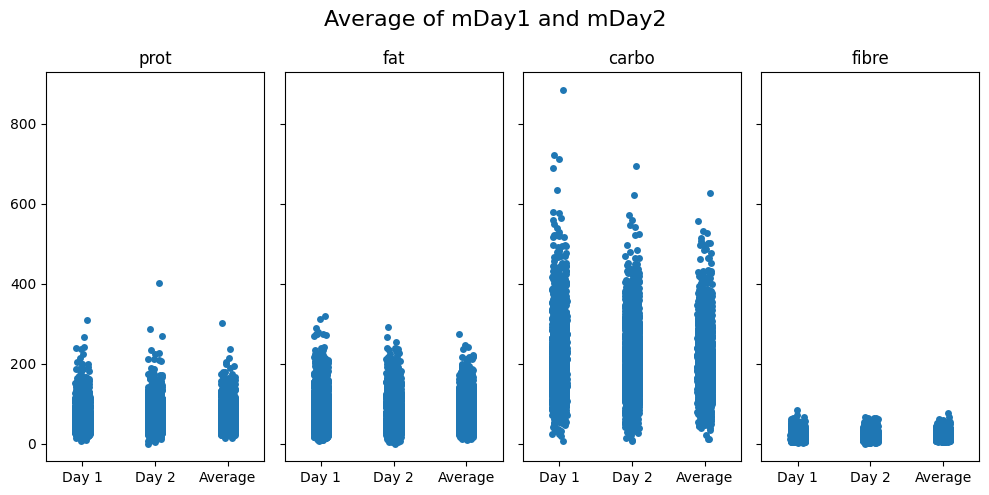

In [ ]:
#only visualize the average with the two days
df_food_nut_day_sub_diff_aver=df_food_nut_day_sub_diff.loc[df_food_nut_day_sub_diff['mDay']!=3.0,:]

# Set x and y variables
x_var = 'mDay'
y_vars = ['prot', 'fat', 'carbo', 'fibre']

# eate 1x4 subplots (1 rows, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(10, 5),sharey=True)

# Define custom x-tick labels
custom_tick_positions = [0, 1.0, 2.0]
custom_tick_labels = ['Day 1', 'Day 2', 'Average']

# Plot each y-variable with categorical x in a subplot
for ax, y in zip(axes, y_vars):
    sns.stripplot(data=df_food_nut_day_sub_diff_aver, x=x_var, y=y, ax=ax, jitter=True, size=5)
    ax.set_title(f'{y}')
    ax.set_xlabel(x_var)
    ax.set_ylabel('')
    # Change x-axis labels
    ax.set_xticks(custom_tick_positions)
    ax.set_xticklabels(custom_tick_labels)
    #Remove x-axis label text
    ax.set_xlabel('')


# Add overall figure title
fig.suptitle('Average of mDay1 and mDay2', fontsize=16)


# Adjust layout
plt.tight_layout()
plt.show()

#We can learn a few trends in these data:


*   **Participants consume most carbohydrates and least fibres.**
*   **Carbohydrates and fibre are the two most contrasting food groups.**
*   **There might be day variation in food consumption as the pattern for two days are slight different.**
*   **The difference between day1 and day2 are evenly distributed around 0.**
*   **The average between day1 and day2 is very similar to day 1 or day2.**
*   **For the following exploratory analysis, we can use the average of day1 and day2 as the consumption of food per day.**








#Merge the data of food comsumption per day and participants
    
*   Merge dataset based on Participant identification code: p_id




#Calculate the average of mDay1 and mDay2 in food comsumption per day.CSV and name it as mDay 3

In [ ]:
df_food_nut_day.columns

Index(['p_id', 'cd_id', 'mDay', 'enkcal', 'ENkj', 'ENmj', 'prot', 'prot_veg',
       'prot_ani', 'fat', 'SFA', 'PUFA', 'MUFA', 'UFA_cis', 'TFA', 'LA', 'ALA',
       'EPA', 'DHA', 'marine', 'cholest', 'carbo', 'modisac', 'polysac',
       'fibre', 'fibre_MJ', 'alcohol', 'org_acid', 'ca', 'cu', 'fe', 'fe_haem',
       'fe_nonhaem', 'iodine', 'kalium', 'mg', 'na', 'phosphorus', 'se', 'zn',
       'b_carotene', 'ret', 'RAE', 'vitB1', 'vitB1_MJ', 'vitB2', 'vitB3',
       'vitB3_MJ', 'vitB6', 'vitB12', 'syn_fol', 'folate', 'foleq', 'vitC',
       'vitD', 'vitE', 'Vitk', 'Vitk1', 'water', 'ENprot', 'ENfat', 'enSFA',
       'enPUFA', 'enMUFA', 'enUFA_cis', 'enTFA', 'enLA', 'enALA', 'enMarine',
       'ENcarbo', 'ENmodisac', 'ENpolysac', 'ENadd_sugar', 'ENfree_sugar',
       'ENalcohol', 'ENorg_acid'],
      dtype='object')

In [ ]:
df_food_nut_day.dtypes

In [ ]:
df_food_nut_day['p_id']=df_food_nut_day['p_id'].astype(float)
df_food_nut_day['cd_id']=df_food_nut_day['cd_id'].astype(float)
df_food_nut_day['mDay']=df_food_nut_day['mDay'].astype(float)

In [ ]:

# Columns to compute average on
calc_cols = ['enkcal', 'ENkj', 'ENmj', 'prot', 'prot_veg','prot_ani', 'fat',
             'SFA', 'PUFA', 'MUFA', 'UFA_cis', 'TFA', 'LA', 'ALA',
             'EPA', 'DHA', 'marine', 'cholest', 'carbo', 'modisac', 'polysac',
             'fibre', 'fibre_MJ', 'alcohol', 'org_acid', 'ca', 'cu', 'fe', 'fe_haem',
             'fe_nonhaem', 'iodine', 'kalium', 'mg', 'na', 'phosphorus', 'se', 'zn',
             'b_carotene', 'ret', 'RAE', 'vitB1', 'vitB1_MJ', 'vitB2', 'vitB3',
             'vitB3_MJ', 'vitB6', 'vitB12', 'syn_fol', 'folate', 'foleq', 'vitC',
             'vitD', 'vitE', 'Vitk', 'Vitk1', 'water', 'ENprot', 'ENfat', 'enSFA',
             'enPUFA', 'enMUFA', 'enUFA_cis', 'enTFA', 'enLA', 'enALA', 'enMarine',
             'ENcarbo', 'ENmodisac', 'ENpolysac', 'ENalcohol', 'ENorg_acid']

# Keep other columns (optional)
other_cols = [col for col in df_food_nut_day.columns if col not in calc_cols]

# Store result rows
new_rows = []

for i in range(0, len(df_food_nut_day), 2):
    row1 = df_food_nut_day.iloc[i]
    new_rows.append(row1)

    if i + 1 < len(df_food_nut_day):
        row2 = df_food_nut_day.iloc[i + 1]
        new_rows.append(row2)

        # Compute difference and average
        avg = (row2[calc_cols] + row1[calc_cols]) / 2

        # Create avg row
        avg_row = pd.Series(index=df_food_nut_day.columns)
        avg_row[calc_cols] = avg
        avg_row[other_cols] = row2[other_cols]
        avg_row['mDay'] = float(3.0) # optional label
        avg_row['cd_id']=f"{int(avg_row['p_id'])}{3}"
        avg_row['cd_id']=float(avg_row['cd_id'])
        new_rows.append(avg_row)

# Combine into DataFrame
df_food_nut_day_aver = pd.DataFrame(new_rows).reset_index(drop=True)


In [ ]:
df_food_nut_day_aver.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,prot_veg,prot_ani,fat,SFA,PUFA,MUFA,UFA_cis,TFA,LA,ALA,EPA,DHA,marine,cholest,carbo,modisac,polysac,fibre,fibre_MJ,alcohol,org_acid,ca,cu,fe,fe_haem,fe_nonhaem,iodine,kalium,mg,na,phosphorus,se,zn,b_carotene,ret,RAE,vitB1,vitB1_MJ,vitB2,vitB3,vitB3_MJ,vitB6,vitB12,syn_fol,folate,foleq,vitC,vitD,vitE,Vitk,Vitk1,water,ENprot,ENfat,enSFA,enPUFA,enMUFA,enUFA_cis,enTFA,enLA,enALA,enMarine,ENcarbo,ENmodisac,ENpolysac,ENadd_sugar,ENfree_sugar,ENalcohol,ENorg_acid
0,1.0,11.0,1.0,1808.959630,7607.587551,7.607588,54.718588,22.224330,32.517315,60.486726,24.861896,9.146671,21.901060,31.047731,0.238200,6.986509,0.907978,0.000000,0.000000,0.000000,111.822540,251.751935,120.788609,131.131826,18.909542,2.485616,0.0,0.522000,915.129344,0.874635,8.069003,0.360,7.709003,137.863258,2989.483293,264.731921,1544.283505,1221.012252,22.762673,7.249139,268.652827,329.345407,361.371757,1.141474,0.150044,1.628678,11.990882,1.576174,1.327895,2.997750,36.000003,143.055192,204.255197,43.790063,1.702000,8.112829,36.236393,28.841260,1772.955127,12.099460,30.093570,12.369379,4.550684,10.896293,15.446977,0.118510,3.475953,0.451741,0.000000,55.667784,26.708967,28.996076,NaN,NaN,0.0,0.086569
1,1.0,12.0,2.0,2302.919679,9676.782787,9.676783,88.036236,21.976600,66.095636,87.523827,36.878745,11.446372,32.224785,43.671157,0.285504,7.977591,1.712227,3.452000,10.500000,13.952000,161.662085,281.101835,154.887868,126.181800,16.905160,1.746981,0.0,2.629334,1497.196142,1.037229,7.886254,1.050,7.256254,200.177168,3946.418309,327.974957,2112.281934,1913.549377,37.502934,10.486481,92.280335,395.163794,399.210128,1.321005,0.136513,2.181666,14.089853,1.456047,1.179986,5.775678,0.000000,335.392620,335.392620,70.634334,2.870562,9.857339,89.936997,42.486927,2232.012006,15.291239,34.205033,14.412518,4.473336,12.593712,17.067048,0.111577,3.117708,0.669152,0.005453,48.825296,26.902869,21.916839,NaN,NaN,0.0,0.342522
2,1.0,13.0,3.0,2055.939654,8642.185169,8.642185,71.377412,22.100465,49.306476,74.005277,30.870321,10.296521,27.062923,37.359444,0.261852,7.482050,1.310103,1.726000,5.250000,6.976000,136.742312,266.426885,137.838239,128.656813,17.907351,2.116299,0.0,1.575667,1206.162743,0.955932,7.977629,0.705,7.482629,169.020213,3467.950801,296.353439,1828.282720,1567.280814,30.132804,8.867810,180.466581,362.254601,380.290942,1.231240,0.143278,1.905172,13.040368,1.516111,1.253941,4.386714,18.000001,239.223906,269.823909,57.212198,2.286281,8.985084,63.086695,35.664093,2002.483567,13.695349,32.149302,13.390948,4.512010,11.745002,16.257013,0.115044,3.296831,0.560447,0.002726,52.246540,26.805918,25.456457,NaN,NaN,0.0,0.214545
3,2.0,21.0,1.0,2028.023607,8530.880049,8.530880,77.786069,29.298938,48.429143,60.644398,20.310128,11.016015,22.749960,33.765975,0.507048,9.398027,0.973590,11.892475,5.782087,17.674562,115.151452,280.762522,146.666979,134.095543,15.799438,1.852029,0.0,5.558485,783.810413,0.924756,7.982688,0.000,7.143224,183.222213,2870.715329,257.219292,2192.881846,1261.723900,35.722968,9.586552,286.834321,178.688295,216.517384,1.751294,0.205289,1.364691,15.626959,1.831811,1.384774,2.487435,0.000000,230.070020,230.070020,178.995162,0.824681,5.980006,29.823670,22.343436,1894.697867,15.342241,26.912881,9.013265,4.888707,10.096019,14.984726,0.225018,4.170673,0.432061,0.007844,55.376579,28.928062,26.448517,NaN,NaN,0.0,0.822252
4,2.0,22.0,2.0,2291.034409,9571.308049,9.571308,58.893552,34.289752,24.603800,120.999771,29.509965,36.607110,47.476655,84.083764,0.189000,34.637553,1.635220,18.200000,32.899999,51.099999,132.378000,228.588698,99.549367,128.762090,20.658634,2.158392,0.0,3.563600,782.287071,2.065319,8.501207,0.000,8.121207,127.495061,3030.684288,388.637358,2192.497394,1259.179869,72.724414,7.949913,713.916398,194.204001,260.646000,0.732209,0.076500,1.002132,16.070097,1.678986,1.217945,1.795680,0.000000,189.177001,189.177001,44.181034,0.432000,23.203248,34.602483,7.847283,2962.097806,10.282439,47.533024,11.592567,14.380578,18.650523,33.031101,0.074246,1

In [ ]:
df_food_nut_day_aver.dtypes

,0
p_id,float64
cd_id,float64
mDay,float64
enkcal,float64
ENkj,float64
...,...
ENpolysac,float64
ENadd_sugar,float64
ENfree_sugar,float64
ENalcohol,float64


In [ ]:
df_food_nut_day_aver_only=df_food_nut_day_aver.loc[df_food_nut_day_aver['mDay']==3.0,:]

In [ ]:
df_food_nut_day_aver_only.head()

,p_id,cd_id,mDay,enkcal,ENkj,ENmj,prot,prot_veg,prot_ani,fat,SFA,PUFA,MUFA,UFA_cis,TFA,LA,ALA,EPA,DHA,marine,cholest,carbo,modisac,polysac,fibre,fibre_MJ,alcohol,org_acid,ca,cu,fe,fe_haem,fe_nonhaem,iodine,kalium,mg,na,phosphorus,se,zn,b_carotene,ret,RAE,vitB1,vitB1_MJ,vitB2,vitB3,vitB3_MJ,vitB6,vitB12,syn_fol,folate,foleq,vitC,vitD,vitE,Vitk,Vitk1,water,ENprot,ENfat,enSFA,enPUFA,enMUFA,enUFA_cis,enTFA,enLA,enALA,enMarine,ENcarbo,ENmodisac,ENpolysac,ENadd_sugar,ENfree_sugar,ENalcohol,ENorg_acid
2,1.0,13.0,3.0,2055.939654,8642.185169,8.642185,71.377412,22.100465,49.306476,74.005277,30.870321,10.296521,27.062923,37.359444,0.261852,7.482050,1.310103,1.726000,5.250000,6.976000,136.742312,266.426885,137.838239,128.656813,17.907351,2.116299,0.0,1.575667,1206.162743,0.955932,7.977629,0.705000,7.482629,169.020213,3467.950801,296.353439,1828.282720,1567.280814,30.132804,8.867810,180.466581,362.254601,380.290942,1.231240,0.143278,1.905172,13.040368,1.516111,1.253941,4.386714,18.000001,239.223906,269.823909,57.212198,2.286281,8.985084,63.086695,35.664093,2002.483567,13.695349,32.149302,13.390948,4.512010,11.745002,16.257013,0.115044,3.296831,0.560447,0.002726,52.246540,26.805918,25.456457,NaN,NaN,0.0,0.214545
5,2.0,23.0,3.0,2159.529008,9051.094049,9.051094,68.339811,31.794345,36.516472,90.822085,24.910047,23.811562,35.113307,58.924870,0.348024,22.017790,1.304405,15.046238,19.341043,34.387281,123.764726,254.675610,123.108173,131.428816,18.229036,2.005211,0.0,4.561043,783.048742,1.495037,8.241947,0.000000,7.632216,155.358637,2950.699809,322.928325,2192.689620,1260.451885,54.223691,8.768233,500.375360,186.446148,238.581692,1.241752,0.140895,1.183412,15.848528,1.755399,1.301360,2.141557,0.000000,209.623510,209.623510,111.588098,0.628341,14.591627,32.213076,15.095359,2428.397837,12.812340,37.222953,10.302916,9.634643,14.373271,24.007913,0.149632,8.888770,0.537217,0.013959,47.643354,23.154373,24.464779,NaN,NaN,0.0,0.644444
8,3.0,33.0,3.0,1339.663797,5621.985118,5.621985,61.948264,24.089505,37.771544,48.666662,15.737070,12.050683,16.511981,28.562664,0.210978,9.278368,1.948288,11.795475,7.500000,19.295475,64.502109,150.285814,80.171648,70.240916,18.225083,3.241136,0.0,4.771075,900.981511,1.003967,7.041656,0.196003,6.640424,145.244802,3024.983991,275.776721,1315.983945,1236.690284,29.193949,7.732831,2577.312210,1159.197411,1432.784973,1.446909,0.257570,1.516762,12.763142,2.271963,1.500184,3.191705,27.000002,277.649856,323.549860,273.902576,2.466449,11.824857,88.286584,84.817656,1406.443017,18.508873,32.684756,10.572904,8.085704,11.092114,19.177818,0.141803,6.225909,1.307636,0.012939,44.871183,23.937677,20.971342,NaN,NaN,0.0,1.068615
11,4.0,43.0,3.0,1900.619353,7973.244593,7.973245,121.189210,20.808199,100.371012,78.244267,30.508973,15.467698,25.109561,40.577260,0.894822,11.391943,2.767910,68.141008,78.625320,146.766327,351.196728,169.508872,65.449921,104.145804,14.374493,1.797788,0.0,1.707392,1143.589691,1.313882,14.364728,5.519643,8.070383,246.705531,2898.724868,283.960929,2326.559692,1793.693903,60.237318,14.303308,3116.126045,556.545386,819.971206,1.158965,0.146386,1.987466,13.858771,1.733682,3.042198,7.448676,44.785719,205.815669,281.951391,21.415780,4.870307,10.172270,97.788583,59.596819,2227.192091,25.765691,36.955337,14.400358,7.307901,11.867410,19.175311,0.423931,5.368793,1.308071,0.071231,35.509922,13.597798,21.929945,NaN,NaN,0.0,0.270078
14,5.0,53.0,3.0,1342.637399,5652.818155,5.652818,72.139370,24.526946,47.612424,39.865427,15.052951,6.180534,14.296569,20.477103,0.500000,5.164952,0.838238,36.130000,136.500000,172.630000,101.709588,162.436365,57.204956,104.919409,18.571248,3.351062,0.0,2.464800,827.921281,1.159873,8.894754,1.000000,7.334754,183.178007,2952.859587,285.992599,2870.254009,1185.027002,63.143603,9.084858,570.250810,78.624752,144.901163,0.694396,0.123728,1.147221,15.840821,2.940047,1.356160,5.135893,0.000000,199.841785,199.841785,81.766750,1.255500,5.546142,32.441006,31.106606,4106.290287,21.918450,25.248488,9.575949,4.004402

In [ ]:
df_participant_food_day_aver=pd.merge(df_participant,df_food_nut_day_aver_only,how='outer',on='p_id')

In [ ]:
df_participant_food_day_aver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Columns: 419 entries, p_id to ENorg_acid
dtypes: float64(345), int64(63), object(11)
memory usage: 11.4+ MB


In [ ]:
df_participant_food_day_aver.head()

,p_id,age,age_gq,sex,quest,Age4_a,age6,Age8_a,Agesex4_a,Agesex6_a,Agesex8_a,Agesex10_a,agesex12,Agesex16_a,AdultChild_a,Height,Weight,Upperarm,BMI,BMI_cat,BMI_cat_a,Deviation_anthro,edu,edu_level,hh_size,hh_size_4,hh_stat,edu_moth,edu_fath,Migration_background,hh_province,hh_region_4,hh_urb_3,Season,Versionquest_a,FilledinBy,act_cyclnoschool_dpw,act_cyclnoschool_hpd,act_cyclnoschool_mpd,act_physact_tpwcat,ws_playschool_dpw,ws_playschool_hpd,ws_playschool_mpd,ws_swimschool_dpw,ws_swimschool_hpd,ws_swimschool_mpd,act_playnoschool_dpw,act_playnoschool_hpd,act_playnoschool_mpd,act_swimnoschool_dpw,act_swimnoschool_hpd,act_swimnoschool_mpd,act_walknoschool_dpw,act_walknoschool_hpd,act_walknoschool_mpd,act_playout_dpwcat,act_playout_tpdcat,ws_walk_dpw,ws_walk_hpd,ws_walk_mpd,ws_cycl_dpw,ws_cycl_hpd,ws_cycl_mpd,ws_gymschool_dpw,ws_gymschool_hpd,ws_gymschool_mpd,ws_sport_oth_dpw,ws_sport_oth_hpd,ws_sport_oth_mpd,ws_lw_hpw,ws_hw_hpw,workhh_lw_dpw,workhh_lw_hpd,workhh_lw_mpd,workhh_hw_dpw,workhh_hw_hpd,workhh_hw_mpd,walkrec_dpw,walkrec_hpd,walkrec_mpd,cyclrec_dpw,cyclrec_hpd,cyclrec_mpd,gard_dpw,gard_hpd,gard_mpd,odd_dpw,odd_hpd,odd_mpd,sport1_txt,sport1_code,sport1_dpw,sport1_hpd,sport1_mpd,sport2_txt,sport2_code,sport2_dpw,sport2_hpd,sport2_mpd,sport3_txt,sport3_code,sport3_dpw,sport3_hpd,sport3_mpd,sport4_txt,sport4_code,sport4_dpw,sport4_hpd,sport4_mpd,act_screen_week_dpwcat,act_screen_week_hpd,act_screen_week_mpd,act_screen_weekend_dpwcat,act_screen_weekend_hpd,act_screen_weekend_mpd,act_sleep_hpn,act_sleep_mpn,breakf_dpw_cat,act_stair,act_walkshort,appetite,DiffcEat,DiffcEat_chew,DiffcEat_move,DiffcEat_oth,DiffcEat_swall,DiffcEat_teeth,hotmealdeliv_freq,livingsit,thinner,weightloss,Stairs4,Undernutrition,Undernutrition_a,Weightloss3,dietno,diet_milk,diet_chick,diet_glut,diet_nut,diet_lact,diet_allergoth,diet_prot,diet_fat,diet_carborestr,diet_sugarrestr,diet_fibre,diet_energ,diet_Na,diet_easydigest,diet_col,diet_energprot,diet_oth2,rule_no,r_veg_meat,r_veg_meatfish,r_vegan,r_macrobiotic,r_anthr,r_other2,ffq_fish2,ffq_crustshell,ffq_nuts_peanuts,ffq_legumes,ffq_filetam_tpw,ffq_filetam_tpm,ffq_filetam_tpy,ffq_filetam_never,ffq_rbs_tpw,ffq_rbs_tpm,ffq_rbs_tpy,ffq_rbs_never,ffq_sss_tpw,ffq_sss_tpm,ffq_sss_tpy,ffq_sss_never,ffq_msraw_tpw,ffq_msraw_tpm,ffq_msraw_tpy,ffq_msraw_never,ffq_msmedium_tpw,ffq_msmedium_tpm,ffq_msmedium_tpy,ffq_msmedium_never,ffq_mswd_tpw,ffq_mswd_tpm,ffq_mswd_tpy,ffq_mswd_never,ffq_minceraw_tpw,ffq_minceraw_tpm,ffq_minceraw_tpy,ffq_minceraw_never,ffq_mincemedium_tpw,ffq_mincemedium_tpm,ffq_mincemedium_tpy,ffq_mincemedium_never,ffq_mincewd_tpw,ffq_mincewd_tpm,ffq_mincewd_tpy,ffq_mincewd_never,ffq_salt_use,ffq_salt_potato,ffq_salt_pasta,ffq_salt_veg,ffq_salt_meat,ffq_salt_egg,Salttype_potato,Salttype_pasta,Salttype_veg,Salttype_meat,Salttype_egg,Type_salt_other_txt,ffq_coffee_cpd,ffq_coffee_greecetc_cpd,tobac_smoke,tobac_ecigarette,use_alc,alcwd_dpw_cat,beerw_gpd,lowalcbeerw_gpd,winew_gpd,liqw_gpd,spiritw_gpd,mixw_gpd,alcwnd_dpw_cat,beerwnd_gpd,lowalcbeerwnd_gpd,winewnd_gpd,liqwnd_gpd,spiritwnd_gpd,mixwnd_gpd,ffq_sup,ffq_supwin,ffq_use_multmin_win,ffq_use_mult_win,ffq_use_beta_win,ffq_use_fol_win,ffq_use_vitb12_win,ffq_use_vitb_win,ffq_use_vitc_win,ffq_use_vitd_win,ffq_use_vite_win,ffq_use_ca_win,ffq_use_ca_d_win,ffq_use_fe_win,ffq_use_Mg_win,ffq_use_fishomega_win,ffq_use_garlic_win,ffq_use_ginseng_win,ffq_use_ginkgo_win,ffq_use_glucosamine_win,ffq_use_echina_win,ffq_use_Q10_win,ffq_use_cranberry_win,ffq_use_supoth1_win,ffq_use_supoth2_win,ffq_use_supoth3_win,ffq_use_supoth1_win_txt,ffq_use_supoth2_win_txt,ffq_use_supoth3_win_txt,ffq_multmin_win,ffq_mult_win,ffq_beta_win,ffq_fol_win,ffq_vitb12_win,ffq_vitb_win,ffq_vitc_win,ffq_vitd_win,ffq_vite_win,ffq_ca_win,ffq_ca_d_win,ffq_fe_win,ffq_Mg_win,ffq_fishomega_win,ffq_garlic_win,ffq_ginseng_win,ffq_ginkgo_win,ffq_glucosamine_win,ffq_echina_win,ffq_Q10_win,ffq_cranberry_win,ffq_supoth1_win,ffq_supoth2_win,ffq_supoth3_win,ffq_sup_rest,ffq_use_multmin_rest,ffq_use_mult

#Run following correlation analysis
With the merged new dataset df_participant_food_day which combines the participant information and the food comsumption per day, we can run correlation and clustering analysis. We can choose to focus on only one day if necesary.

In [ ]:
df_participant_food_day_aver.columns

Index(['p_id', 'age', 'age_gq', 'sex', 'quest', 'Age4_a', 'age6', 'Age8_a',
       'Agesex4_a', 'Agesex6_a',
       ...
       'enLA', 'enALA', 'enMarine', 'ENcarbo', 'ENmodisac', 'ENpolysac',
       'ENadd_sugar', 'ENfree_sugar', 'ENalcohol', 'ENorg_acid'],
      dtype='object', length=419)

#Variables related with food consumption
After checking all the info of participants, there are following variables might be related with the food consumption:


*   age
*   sex
*   BMI
*   education
*   household size
*   provice
*   native_mother
*   native_father
*   migration
*   season
*   undernutrition
*   difficult eat
*   sleep
*   sport

For sport, the total amount of sport can be calculated from the 4 sports


For sleep, the hours can be calculated from the hours and mins


In [ ]:
df_participant_food_day_aver[['act_sleep_hpn','act_sleep_mpn']].head(10)

,act_sleep_hpn,act_sleep_mpn
0,7,0
1,8,30
2,11,30
3,8,0
4,7,0
5,8,0
6,9,0
7,10,0
8,6,0
9,11,0


In [ ]:
#calculate sleep
df_participant_food_day_aver['act_sleep_h_total']=df_participant_food_day_aver['act_sleep_hpn']+(df_participant_food_day_aver['act_sleep_mpn']/60)
df_participant_food_day_aver[['act_sleep_hpn','act_sleep_mpn','act_sleep_h_total']].head()

,act_sleep_hpn,act_sleep_mpn,act_sleep_h_total
0,7,0,7.0
1,8,30,8.5
2,11,30,11.5
3,8,0,8.0
4,7,0,7.0


In [ ]:
df_participant_food_day_aver[[
    'sport1_dpw','sport1_hpd','sport1_mpd',
    'sport2_dpw','sport2_hpd','sport2_mpd',
    'sport3_dpw','sport3_hpd','sport3_mpd',
    'sport4_dpw','sport4_hpd','sport4_mpd']].head()

,sport1_dpw,sport1_hpd,sport1_mpd,sport2_dpw,sport2_hpd,sport2_mpd,sport3_dpw,sport3_hpd,sport3_mpd,sport4_dpw,sport4_hpd,sport4_mpd
0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_participant_food_day_aver[[
    'sport1_dpw','sport1_hpd','sport1_mpd',
    'sport2_dpw','sport2_hpd','sport2_mpd',
    'sport3_dpw','sport3_hpd','sport3_mpd',
    'sport4_dpw','sport4_hpd','sport4_mpd']]=df_participant_food_day_aver[[
    'sport1_dpw','sport1_hpd','sport1_mpd',
    'sport2_dpw','sport2_hpd','sport2_mpd',
    'sport3_dpw','sport3_hpd','sport3_mpd',
    'sport4_dpw','sport4_hpd','sport4_mpd']].fillna(0)
df_participant_food_day_aver[[
    'sport1_dpw','sport1_hpd','sport1_mpd',
    'sport2_dpw','sport2_hpd','sport2_mpd',
    'sport3_dpw','sport3_hpd','sport3_mpd',
    'sport4_dpw','sport4_hpd','sport4_mpd']].head()

,sport1_dpw,sport1_hpd,sport1_mpd,sport2_dpw,sport2_hpd,sport2_mpd,sport3_dpw,sport3_hpd,sport3_mpd,sport4_dpw,sport4_hpd,sport4_mpd
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_participant_food_day_aver['sport_h_total'] = (
    (df_participant_food_day_aver['sport1_hpd'] + df_participant_food_day_aver['sport1_mpd'] / 60) * df_participant_food_day_aver['sport1_dpw'] +
    (df_participant_food_day_aver['sport2_hpd'] + df_participant_food_day_aver['sport2_mpd'] / 60) * df_participant_food_day_aver['sport2_dpw'] +
    (df_participant_food_day_aver['sport3_hpd'] + df_participant_food_day_aver['sport3_mpd'] / 60) * df_participant_food_day_aver['sport3_dpw'] +
    (df_participant_food_day_aver['sport4_hpd'] + df_participant_food_day_aver['sport4_mpd'] / 60) * df_participant_food_day_aver['sport4_dpw']
)

# Display relevant columns
df_participant_food_day_aver[[
    'sport1_dpw', 'sport1_hpd', 'sport1_mpd',
    'sport2_dpw', 'sport2_hpd', 'sport2_mpd',
    'sport3_dpw', 'sport3_hpd', 'sport3_mpd',
    'sport4_dpw', 'sport4_hpd', 'sport4_mpd',
    'sport_h_total'
]].head(10)

,sport1_dpw,sport1_hpd,sport1_mpd,sport2_dpw,sport2_hpd,sport2_mpd,sport3_dpw,sport3_hpd,sport3_mpd,sport4_dpw,sport4_hpd,sport4_mpd,sport_h_total
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75
5,3.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.50
6,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


#Look into the variables related with food consumption

In [ ]:
df_participant_food_day_aver_focus=df_participant_food_day_aver.loc[:,['p_id','age','sex','BMI',
                                                                       'edu','edu_moth','edu_fath','Migration_background',
                                                                       'hh_size','hh_province','Season',
                                                                       'act_sleep_h_total','sport_h_total',
                                                                       'DiffcEat','livingsit','Undernutrition',
                                                                       'prot', 'fat', 'carbo', 'fibre']]
df_participant_food_day_aver_focus.head()

,p_id,age,sex,BMI,edu,edu_moth,edu_fath,Migration_background,hh_size,hh_province,Season,act_sleep_h_total,sport_h_total,DiffcEat,livingsit,Undernutrition,prot,fat,carbo,fibre
0,1,31,2,20.7,5.0,NaN,NaN,0,5,10,3,7.0,2.00,NaN,NaN,NaN,71.377412,74.005277,266.426885,17.907351
1,2,16,2,24.2,4.0,5.0,2.0,0,4,8,3,8.5,0.00,NaN,NaN,NaN,68.339811,90.822085,254.675610,18.229036
2,3,3,1,16.6,NaN,7.0,6.0,0,5,8,3,11.5,0.00,NaN,NaN,NaN,61.948264,48.666662,150.285814,18.225083
3,4,17,2,18.6,4.0,3.0,3.0,0,7,5,4,8.0,0.00,NaN,NaN,NaN,121.189210,78.244267,169.508872,14.374493
4,5,56,2,30.8,4.0,NaN,NaN,0,4,8,4,7.0,0.75,NaN,NaN,NaN,72.139370,39.865427,162.436365,18.571248


In [ ]:
df_participant_food_day_aver_focus.dtypes

,0
p_id,int64
age,int64
sex,int64
BMI,float64
edu,float64
edu_moth,float64
edu_fath,float64
Migration_background,int64
hh_size,int64
hh_province,int64


#Explanation of different variables

**p_id**-it is the participant ID

**age**

**sex**-1=male, 2=female

**BMI** - BMI=weight(kg)/height(m^2)

**edu** - Highest completed education of participant 0: "No education", 1: "primary education", 2: "lower vocational education", 3: "advanced elementary education", 4: "intermediate vocational education", 5: "higher general secondary education", 6: "higher vocational education", 7: "university", 8: "other"

**edu_moth**-Highest education of mother of participant，999="Unknown",1="primary education", 2="lower vocational education", 3="advanced elementary education", 4="intermediate vocational education",5="higher general secondary education",6="higher vocational education",7="university",8="Other",	9="Does not apply"

**edu_fath**-Highest education of father of participant，999="Unknown",1="primary education", 2="lower vocational education", 3="advanced elementary education", 4="intermediate vocational education",5="higher general secondary education",6="higher vocational education",7="university",8="Other",	9="Does not apply"

**hh_size** - Household size

**Migration_background** 0="Dutch", 1="Western immigrant", 2="Non-Western immigrant"

**hh_province**- 1="Groningen", 2="Friesland", 3="Drenthe", 4="Overijssel", 5="Gelderland", 6="Utrecht", 7="Noord-Holland", 8="Zuid-Holland", 9="Zeeland", 10="Flevoland", 11="Noord-Brabant", 12="Limburg"

**Season**- 1 = "Spring", 2="Summer", 3="Autumn", 4 = "Winter"

**DiffcEat**-Difficulty with eating and drinking, 999="Unknown", 1="No difficulty with eating and drinking", 2="Yes, some difficulty with eating and drinking", 3="Yes, great difficulty with eating and drinking", 4="Yes, participant can only eat and drink with help from others"

**livingsit**-Living situation of participant, 999="Unknown", 1="Single-family dwelling, detached house, apartment, farm, flat", 2="Service flat, woon-zorgcomplex, elderly commune", 3="Flat for elderly / pensioners / old people", 4="Aanleunwoning, zorgwoning (living self-reliant near a rest home) ", 5="Inleunwoning (living self-reliant in a rest home )", 6="Other"

**Undernutrition** - 999="Unknown", 1="No undernutrition","2=""At risk of undernutrition (loss of appetite in last week and difficulties in walking stairs of 15 steps)","3="Undernutrition (mid-upper arm circumference <25 cm or unintended weight loss 4 kg in 6 months)"

#Distribution of categorical variables

In [ ]:
categorical_columns = ['sex', 'edu', 'edu_moth', 'edu_fath', 'Migration_background', 'hh_province', 'Season', 'DiffcEat', 'livingsit',
                       'Undernutrition']

for col in categorical_columns:

    print(f"Category in {col} is : {df_participant_food_day_aver_focus[col].unique()}")

Category in sex is : [2 1]
Category in edu is : [ 5.  4. nan  8.  7.  6.  3.  2.  1.  0.]
Category in edu_moth is : [nan  5.  7.  3.  6.  2.  4.  9.  1.  8.]
Category in edu_fath is : [nan  2.  6.  3.  4.  7.  1.  5.  9.  8.]
Category in Migration_background is : [  0   2   1 999]
Category in hh_province is : [10  8  5  7 11 12  4  1  9  6  2  3]
Category in Season is : [3 4 2 1]
Category in DiffcEat is : [nan  1.  2.]
Category in livingsit is : [nan  6.  1.  4.  3.  2.]
Category in Undernutrition is : [ nan 999.   1.   3.]


In [ ]:
df_participant_food_day_aver_focus[categorical_columns] = df_participant_food_day_aver_focus[categorical_columns].astype('object')
df_participant_food_day_aver_focus.dtypes

,0
p_id,int64
age,int64
sex,object
BMI,float64
edu,object
edu_moth,object
edu_fath,object
Migration_background,object
hh_size,int64
hh_province,object


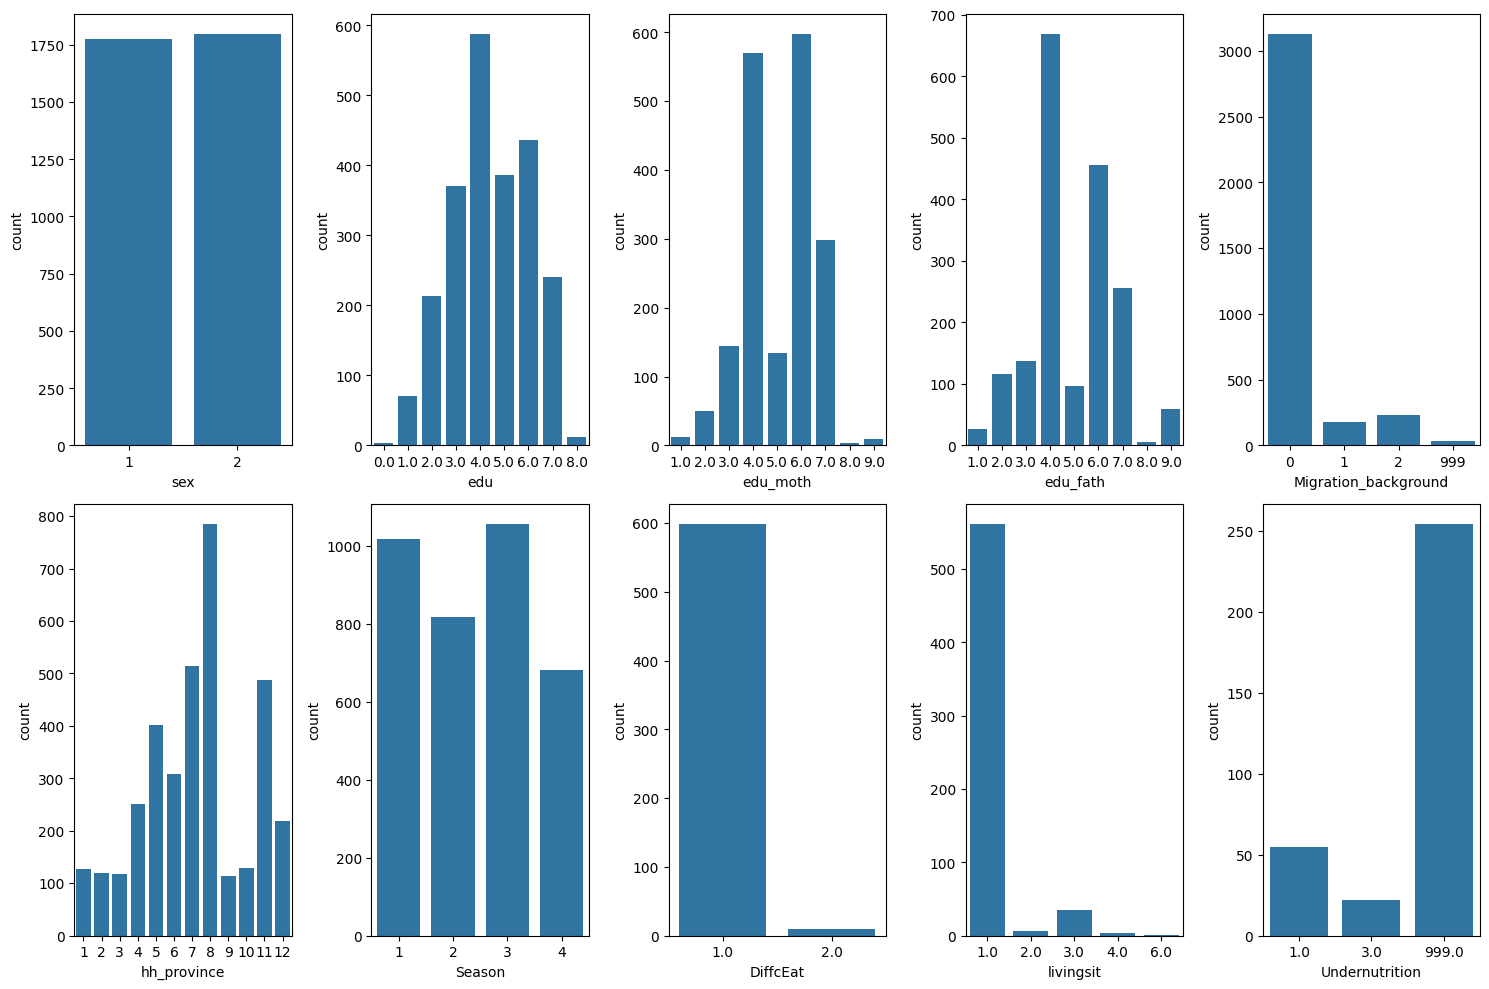

In [ ]:
#Check the pattern of categorical variables
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()
i=0
for col in categorical_columns:
    sns.countplot(data=df_participant_food_day_aver_focus,x=col,ax=ax[i])
    i+=1

# Add overall figure title
fig.suptitle('Distribution of categorical variables', fontsize=16)

plt.tight_layout()
plt.show()

#Distribution of numerical columns

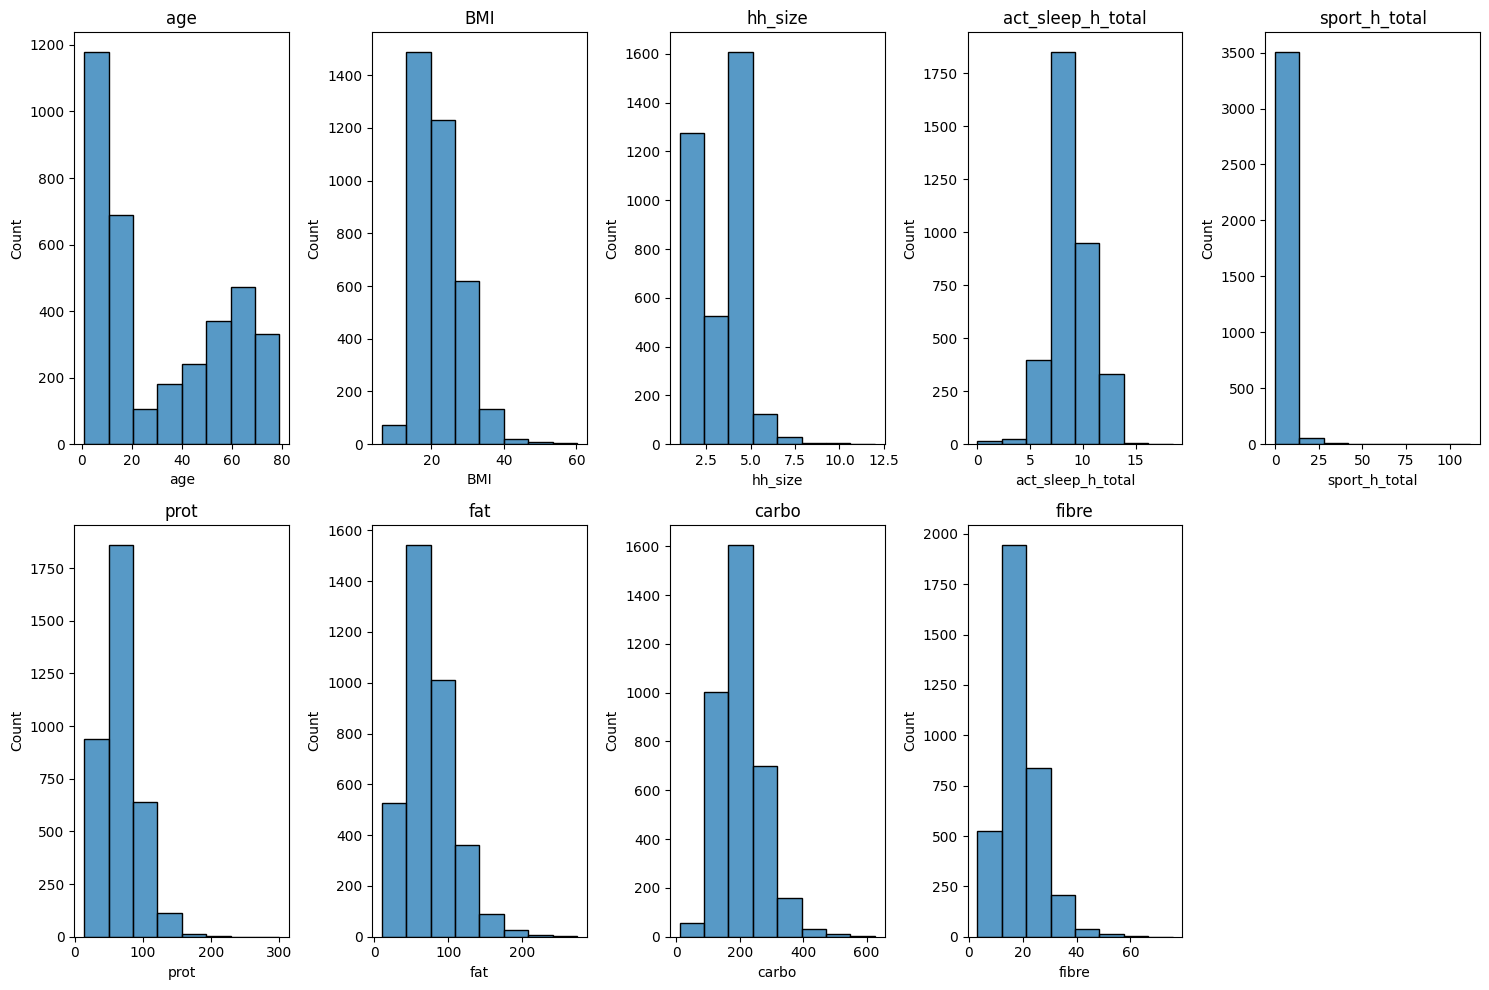

In [ ]:
# Distribution of Numerical Features
numerical_columns = ['age','BMI','hh_size','act_sleep_h_total','sport_h_total','prot', 'fat', 'carbo', 'fibre']

plt.figure(figsize=(15,10))
for col in numerical_columns:
    plt.subplot(2, 5, numerical_columns.index(col) + 1)
    sns.histplot(data=df_participant_food_day_aver_focus[col],bins=8)
    plt.title(col)

# Add overall figure title
fig.suptitle('Distribution of numerical columns', fontsize=16)


plt.tight_layout()
plt.show()

#Correlation between different food consumption per day and different categorical variables

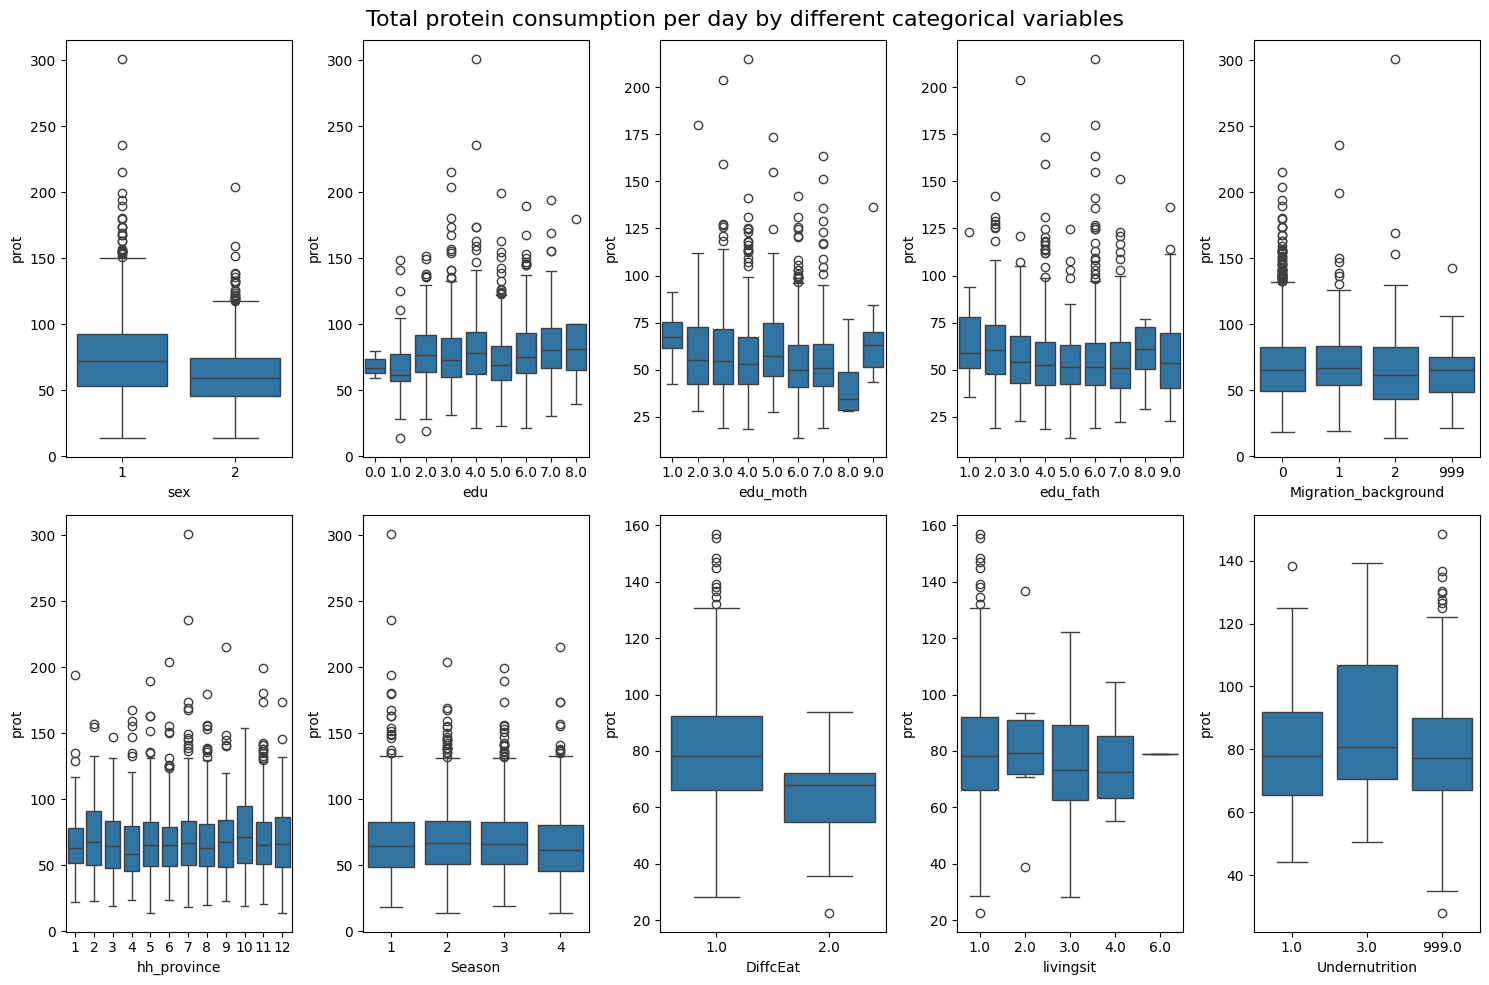

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()
i=0
for col in categorical_columns:
    sns.boxplot(data=df_participant_food_day_aver_focus,x=col,y='prot',ax=ax[i])
    i+=1

# Add overall figure title
fig.suptitle('Total protein consumption per day by different categorical variables', fontsize=16)


plt.tight_layout()
plt.show()

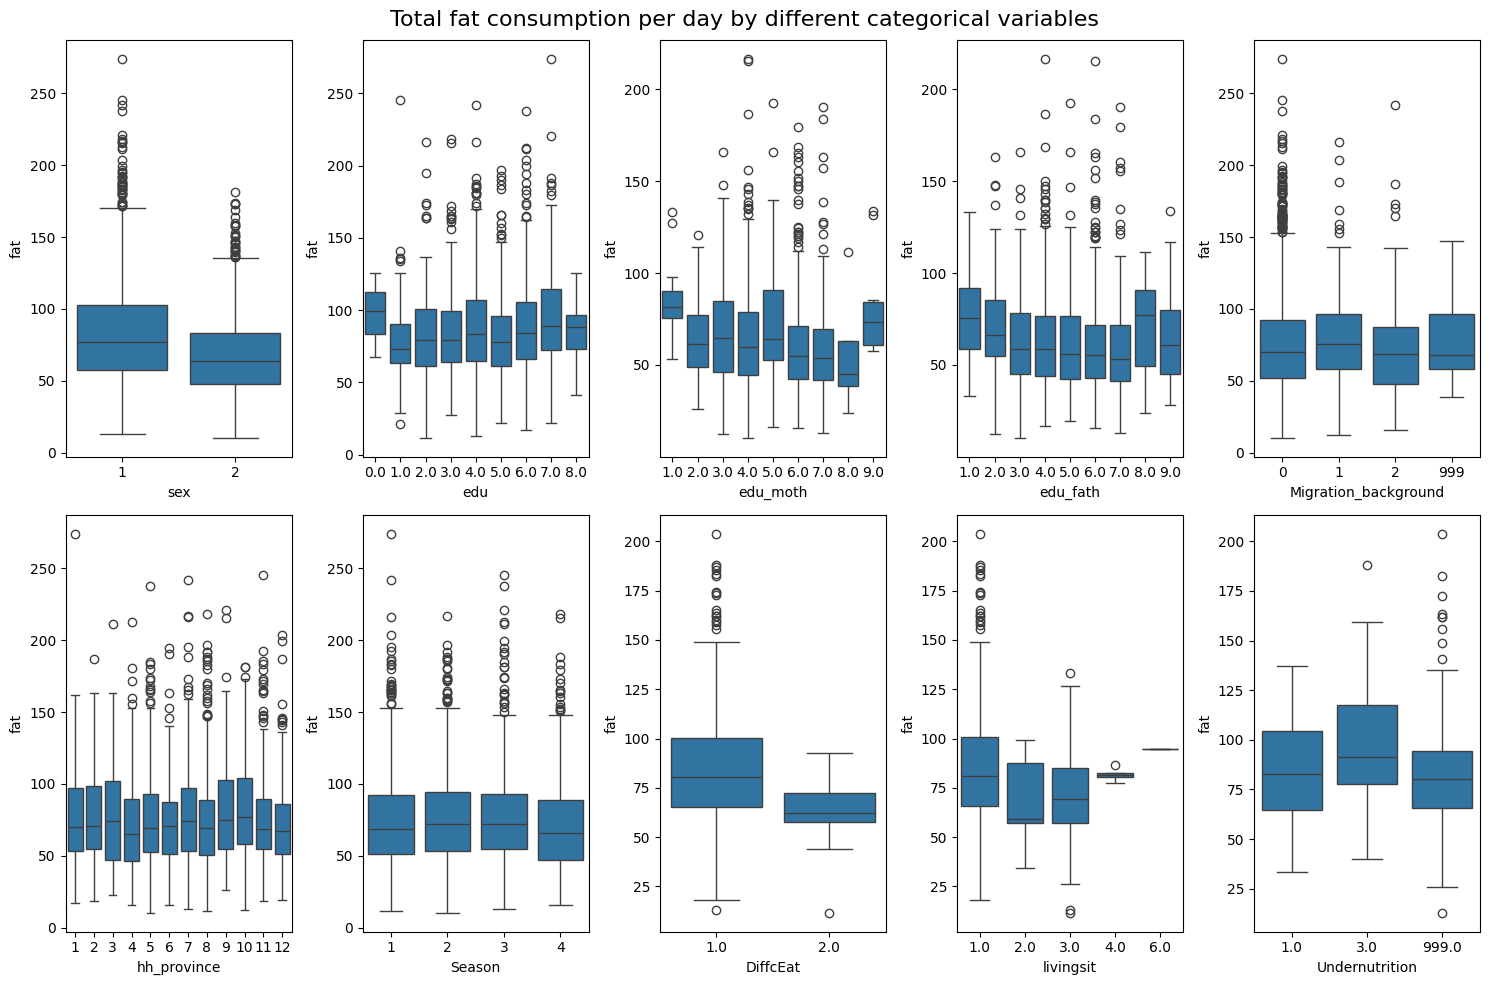

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()
i=0
for col in categorical_columns:
    sns.boxplot(data=df_participant_food_day_aver_focus,x=col,y='fat',ax=ax[i])
    i+=1

# Add overall figure title
fig.suptitle('Total fat consumption per day by different categorical variables', fontsize=16)


plt.tight_layout()
plt.show()

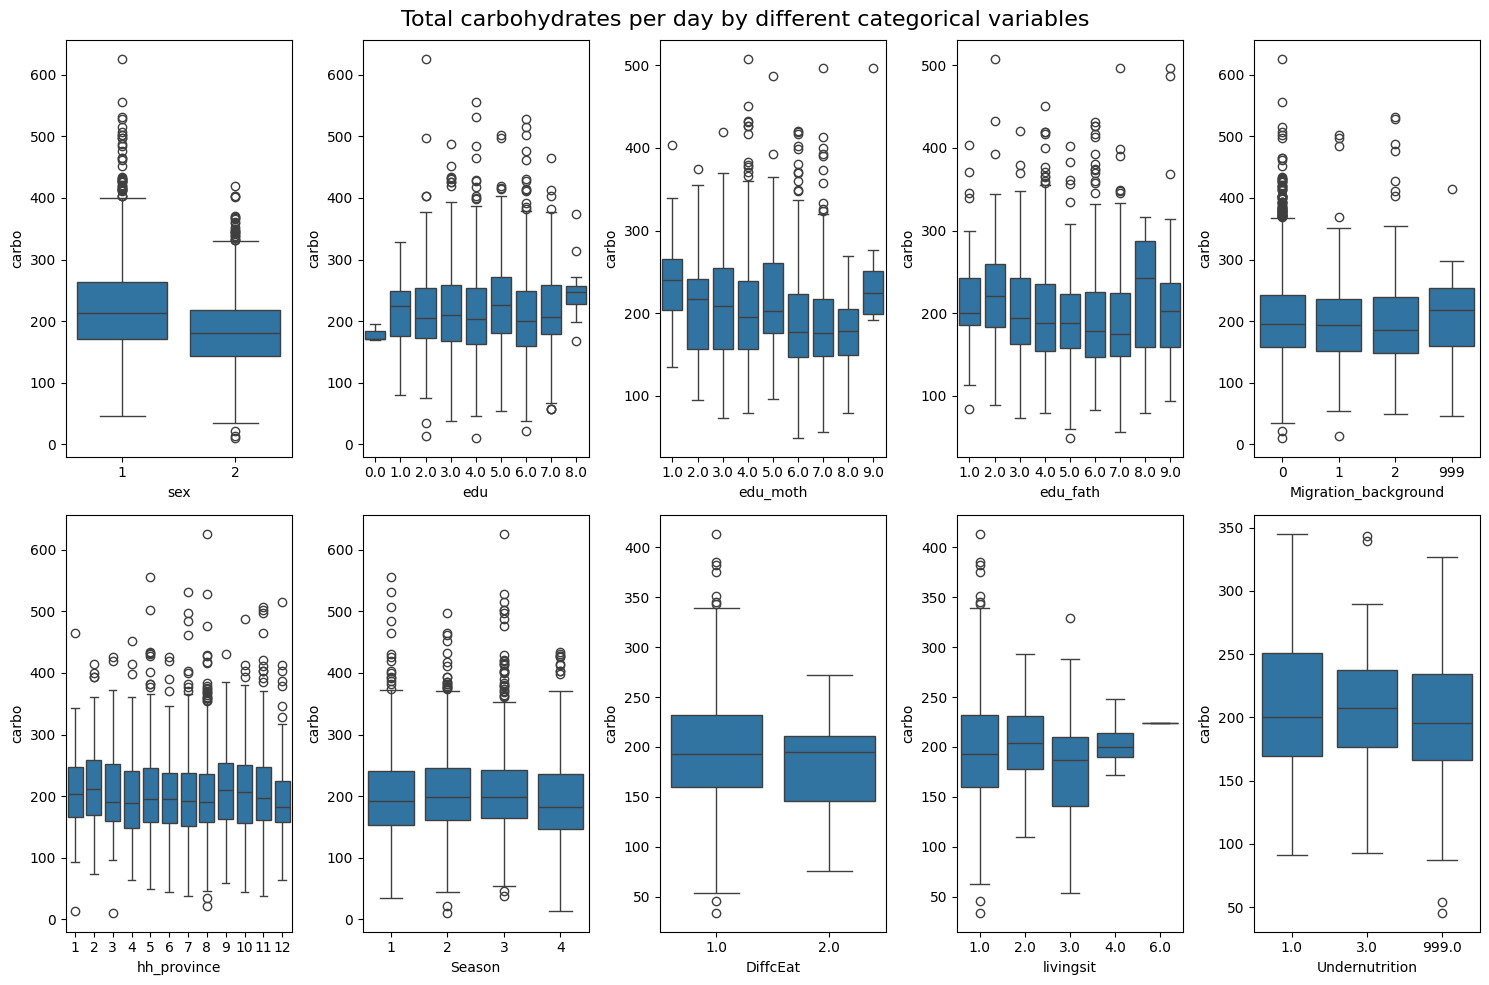

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()
i=0
for col in categorical_columns:
    sns.boxplot(data=df_participant_food_day_aver_focus,x=col,y='carbo',ax=ax[i])
    i+=1

# Add overall figure title
fig.suptitle('Total carbohydrates per day by different categorical variables', fontsize=16)


plt.tight_layout()
plt.show()

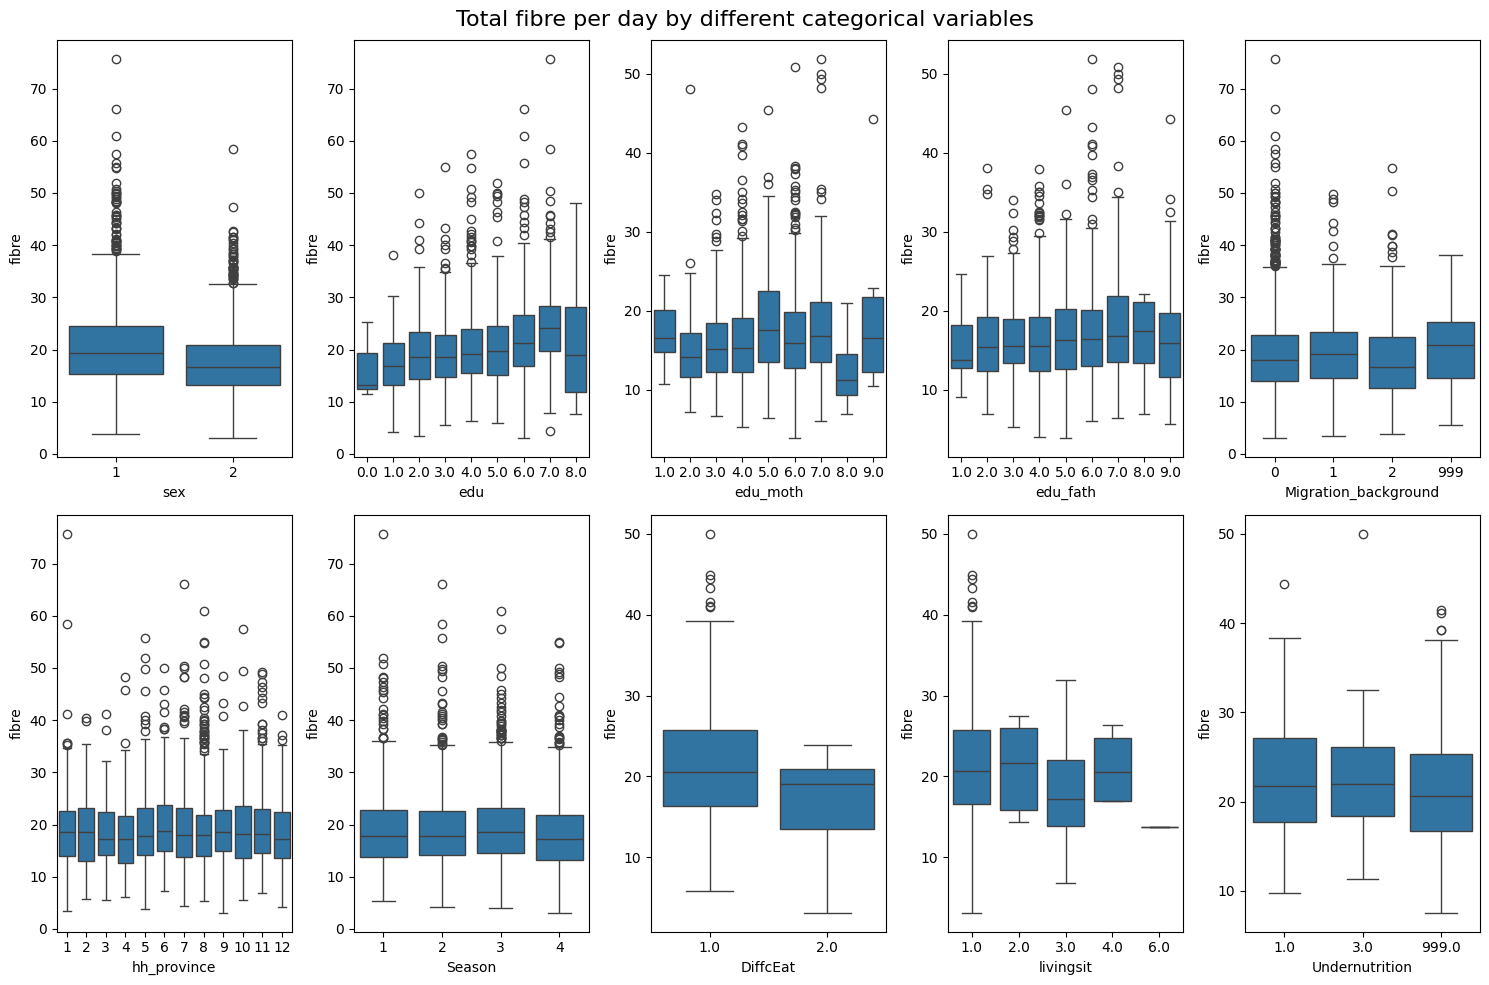

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(15,10))
ax=ax.flatten()
i=0
for col in categorical_columns:
    sns.boxplot(data=df_participant_food_day_aver_focus,x=col,y='fibre',ax=ax[i])
    i+=1

# Add overall figure title
fig.suptitle('Total fibre per day by different categorical variables', fontsize=16)


plt.tight_layout()
plt.show()

#Correlation between numerical variables and different food groups

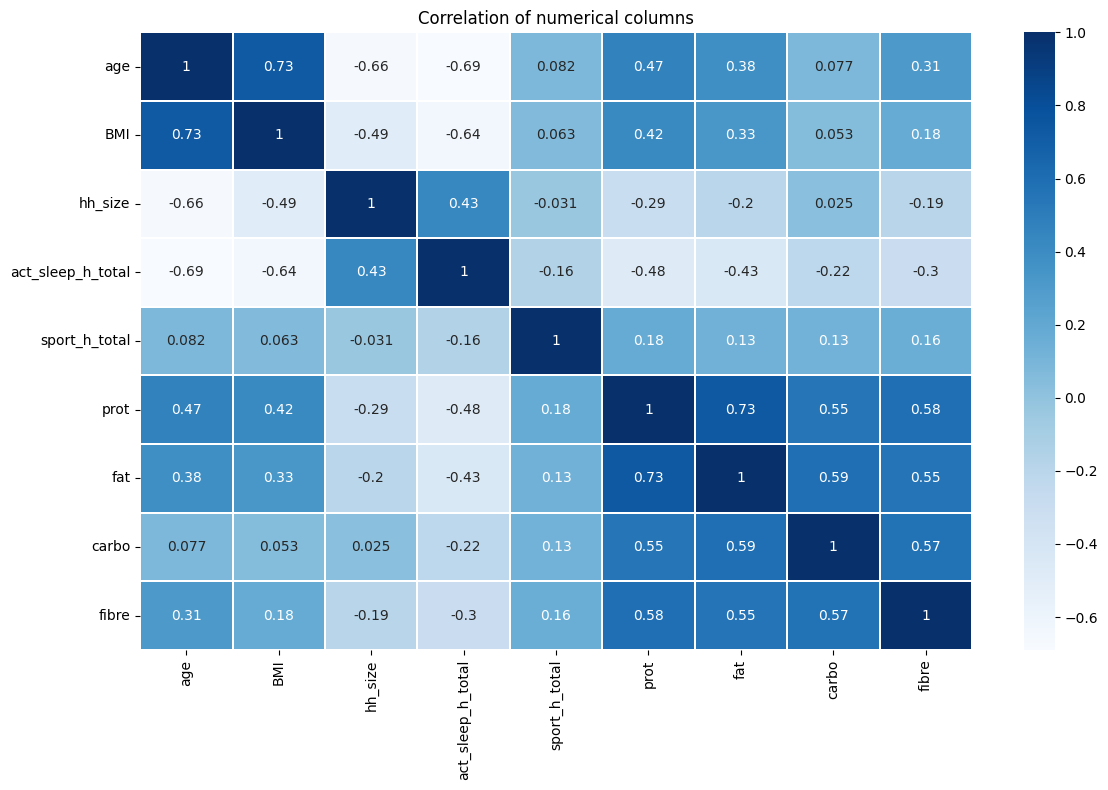

In [ ]:
plt.figure(figsize=(12,8))
correlation_ = df_participant_food_day_aver_focus[numerical_columns].corr(method='pearson')
sns.heatmap(correlation_,annot=True,cmap='Blues', linewidths=0.005)
plt.title('Correlation of numerical columns')
plt.tight_layout()
plt.show()


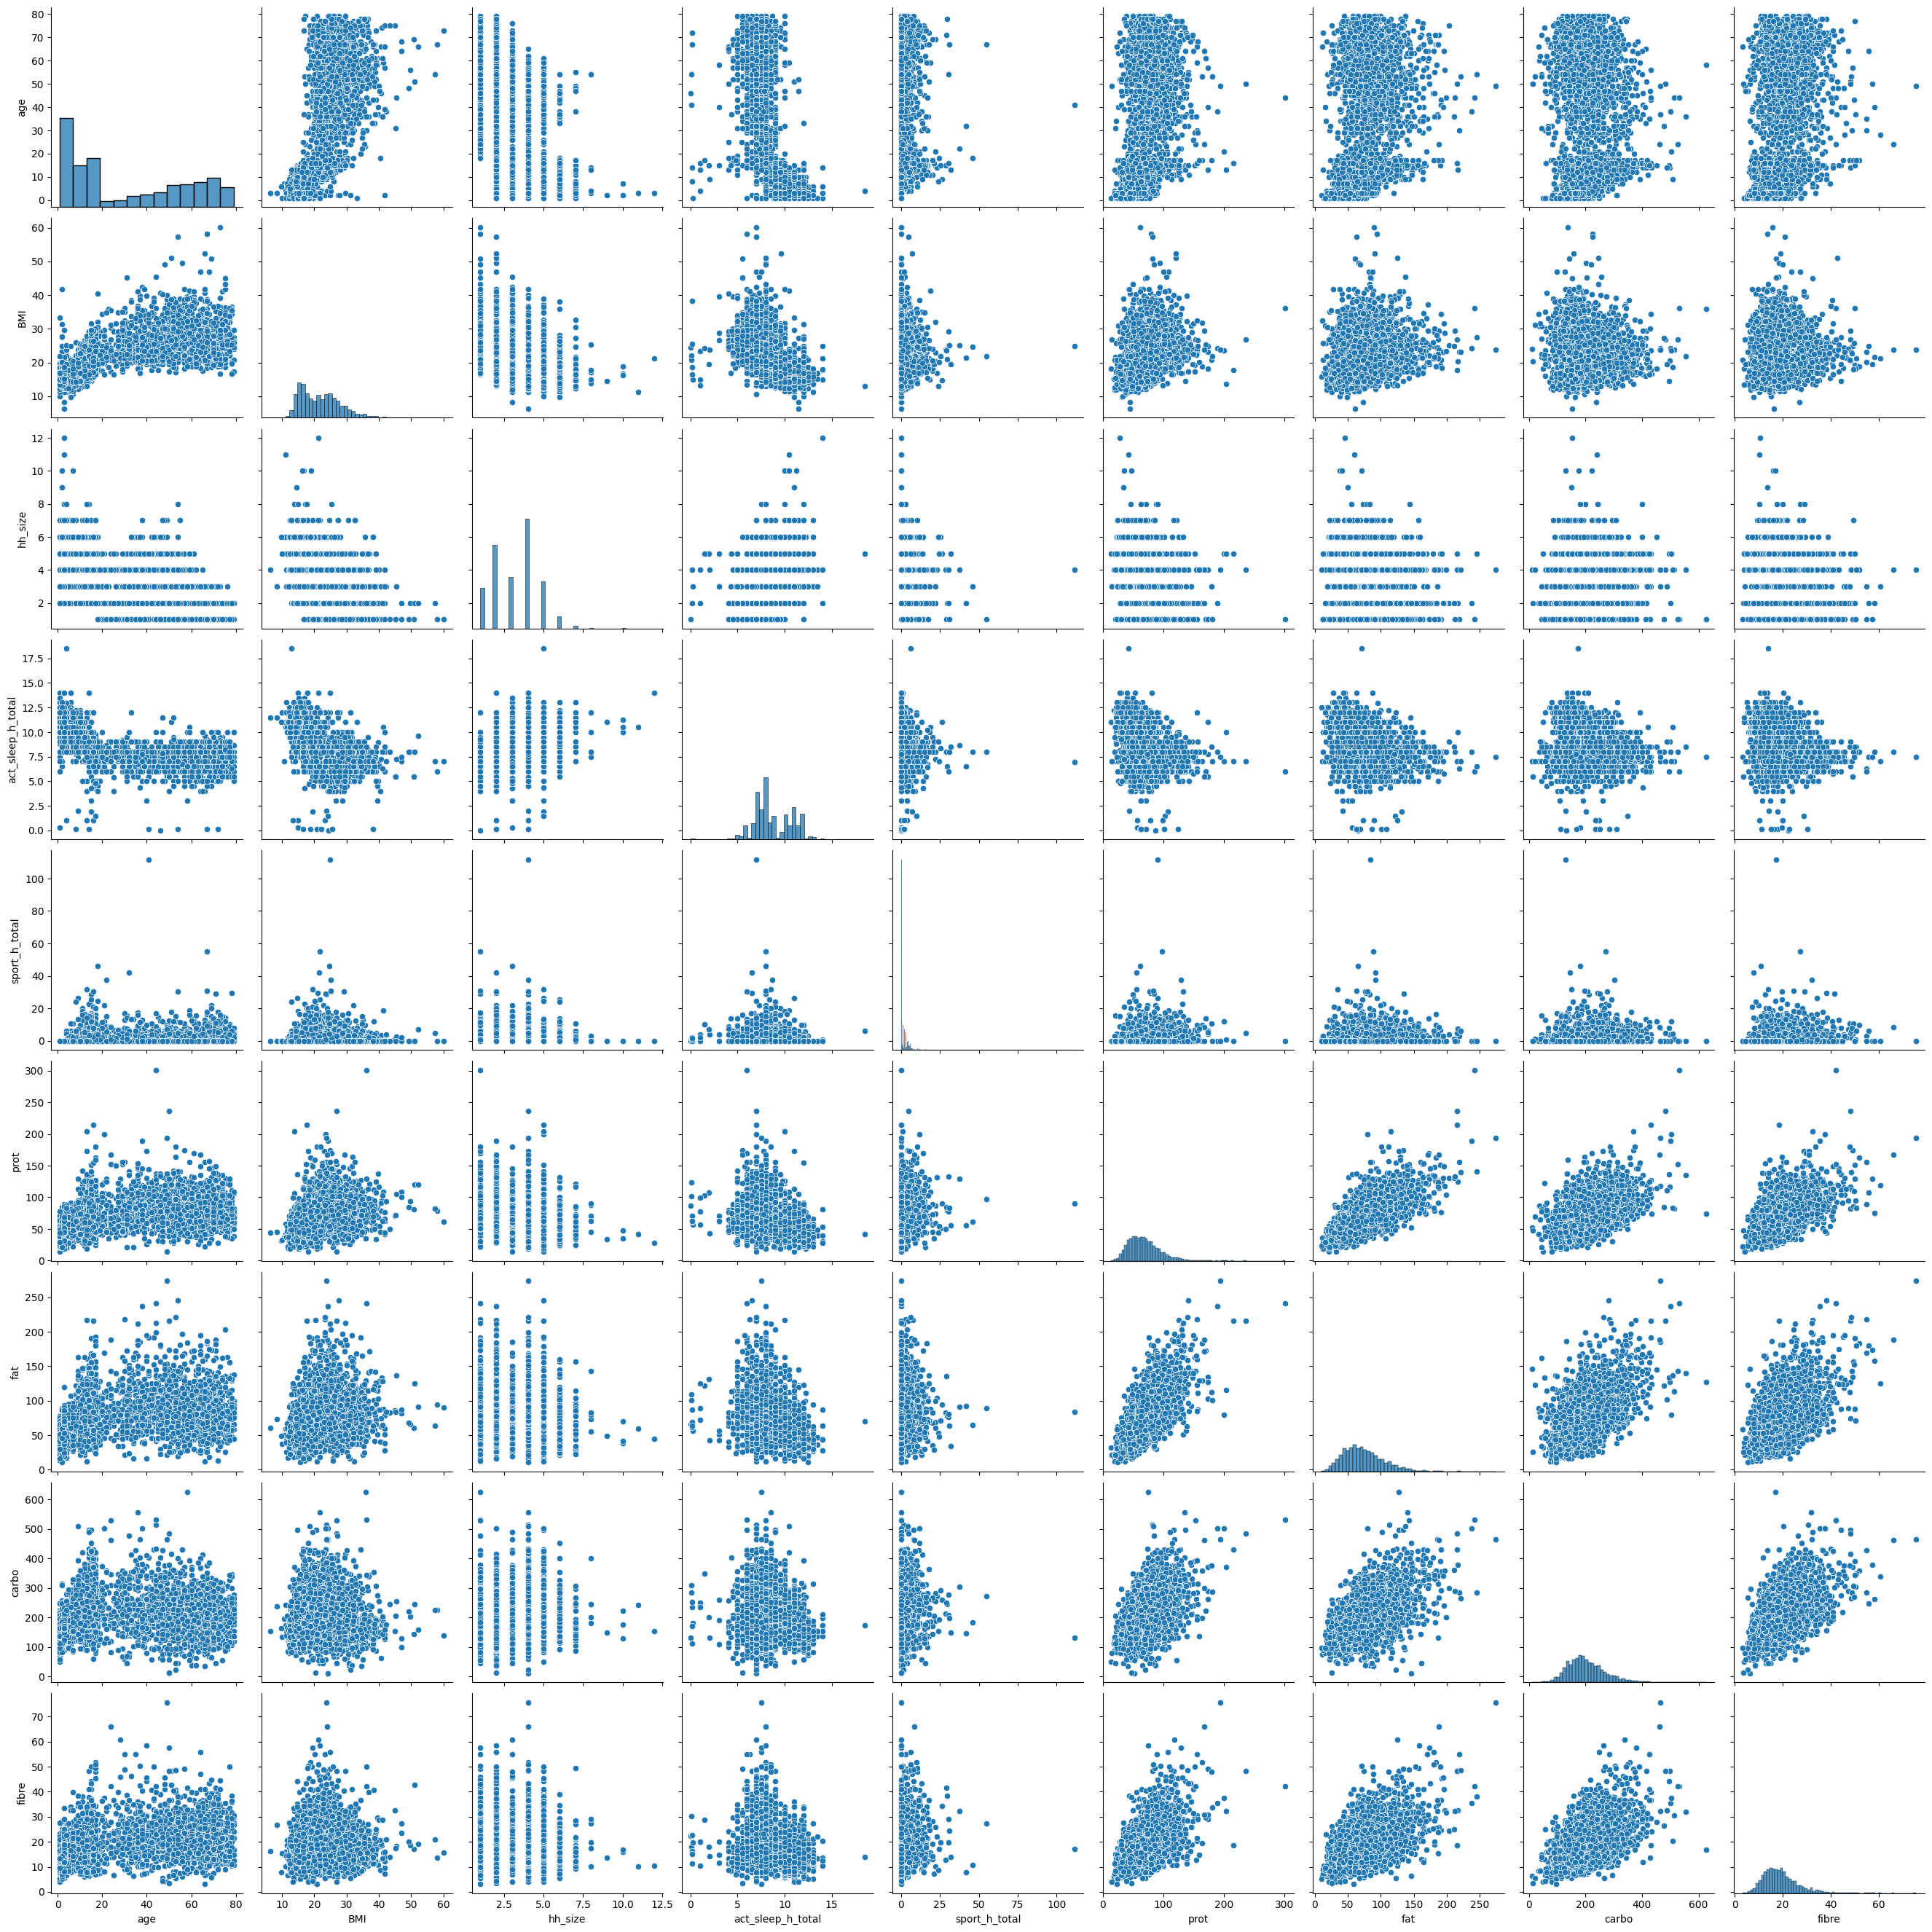

In [ ]:
#Check the detailed correlation pattern
sns.pairplot(df_participant_food_day_aver_focus[numerical_columns], height=3)
plt.show()

#Here are the main findings from the correlation analysis:

I will mainly focus on the sugar and fibre part as you mainly focus on these two categories:


1.   Participants of different sex, eudcation background, with mothers and fathers from different education background and living in different situations differ in the consumption of carbonhydrates and fibre, indicating that these factors play a role in the intake of carbonhydrates and fibre.
2.   Participants of different migration background, with different levels of difficulty of eating and undernutrition consume the similar amount of carbonhydrates and fibre, indicating these factors have little effect on the intake of carbonhydrates and fibre.
3.   Participants show simiar pattern of consumption of carbonhydrates and fibre in different seasons, suggesting season has no effect on the intake of these two food catogories.
4.   The correlation analysis between numeric variables including age, BMI, household size, total sleep time per day, total sport time per day and the consumption of c reveal that there is positive correlation between protein, fact, carbonhydrates and fibre, suggesting participants who consume one nutritent tend to consume more of the other nutrients.